In [1]:
import pandas as pd
import numpy as np
import os, sys
from response import response, response_legacy
import matplotlib.pyplot as plt
import sklearn

## Analyze GPU generated samples

In [2]:
def read_fit_results(root_path, key):
    dataframe = pd.DataFrame()
    list_files = [f for f in os.listdir(root_path) if key in f]
    for i, f in enumerate(list_files):
        df = pd.read_csv(f'{root_path}/{f}')
        if i==0:
            dataframe = df.copy()
            # break
        else:
            dataframe = pd.concat([dataframe, df])
    return dataframe

In [3]:
fit_results_df = read_fit_results(root_path='data/labelledData', key='fit_results')

In [4]:
def plot_dist_var_of_interests(onedf, var_of_interests):
    fig, ax = plt.subplots(3,3,figsize=(5*3, 5*3))
    for idx, var in enumerate(var_of_interests):
        row, col = divmod(idx, 3)
        ax[row, col].hist(onedf[var], bins=50, histtype='step', color='g', label='Fit Results', density=True)
        ax[row, col].set_title(f'Distribution of {var}')
        ax[row, col].set_xlabel(var)
        ax[row, col].set_ylabel('Count')
        ax[row, col].legend()
    plt.tight_layout()

In [5]:
from matplotlib.colors import LogNorm
def corr_var(onedf, var_of_interest):
    fig, ax = plt.subplots(9,9, figsize=(5*9, 5*9))
    for i, v1 in enumerate(var_of_interest):
        for j, v2 in enumerate(var_of_interest):
            h2 = ax[i][j].hist2d(onedf[v1], onedf[v2], 
                            bins=30, norm=LogNorm(),cmap='viridis')
            cbar2 = plt.colorbar(h2[3])
            cbar2.set_label('Counts')
            ax[i][j].set_xlabel(f'{v1}')
            ax[i][j].set_ylabel(f'{v2}')
            # ax[i][j].set_title(c)

def corr_var_pred_original(predictions, fit_params_df, var_of_interest):
    fig, ax = plt.subplots(3,3, figsize=(5*3, 5*3))
    for idx, v1 in enumerate(var_of_interest):
        row, col = divmod(idx, 3)
        # for j, v2 in enumerate(var_of_interest):
        h2 = ax[row][col].hist2d(predictions[v1], fit_params_df[v1], 
                        bins=30, norm=LogNorm(),cmap='viridis')
        cbar2 = plt.colorbar(h2[3])
        cbar2.set_label('Counts')
        ax[row][col].set_xlabel(f'pred_{v1}')
        ax[row][col].set_ylabel(f'fit_params_{v1}')
    plt.tight_layout()

In [6]:
var_of_interest = ['t', 'A_0', 't_p', 'k3', 'k4', 'k5', 'k6', 'integral_R', 'max_deviation']
# var_of_interest = [c for c in fit_results_df.columns if ('Unnamed' not in c) and ('Ch.' not in c)]

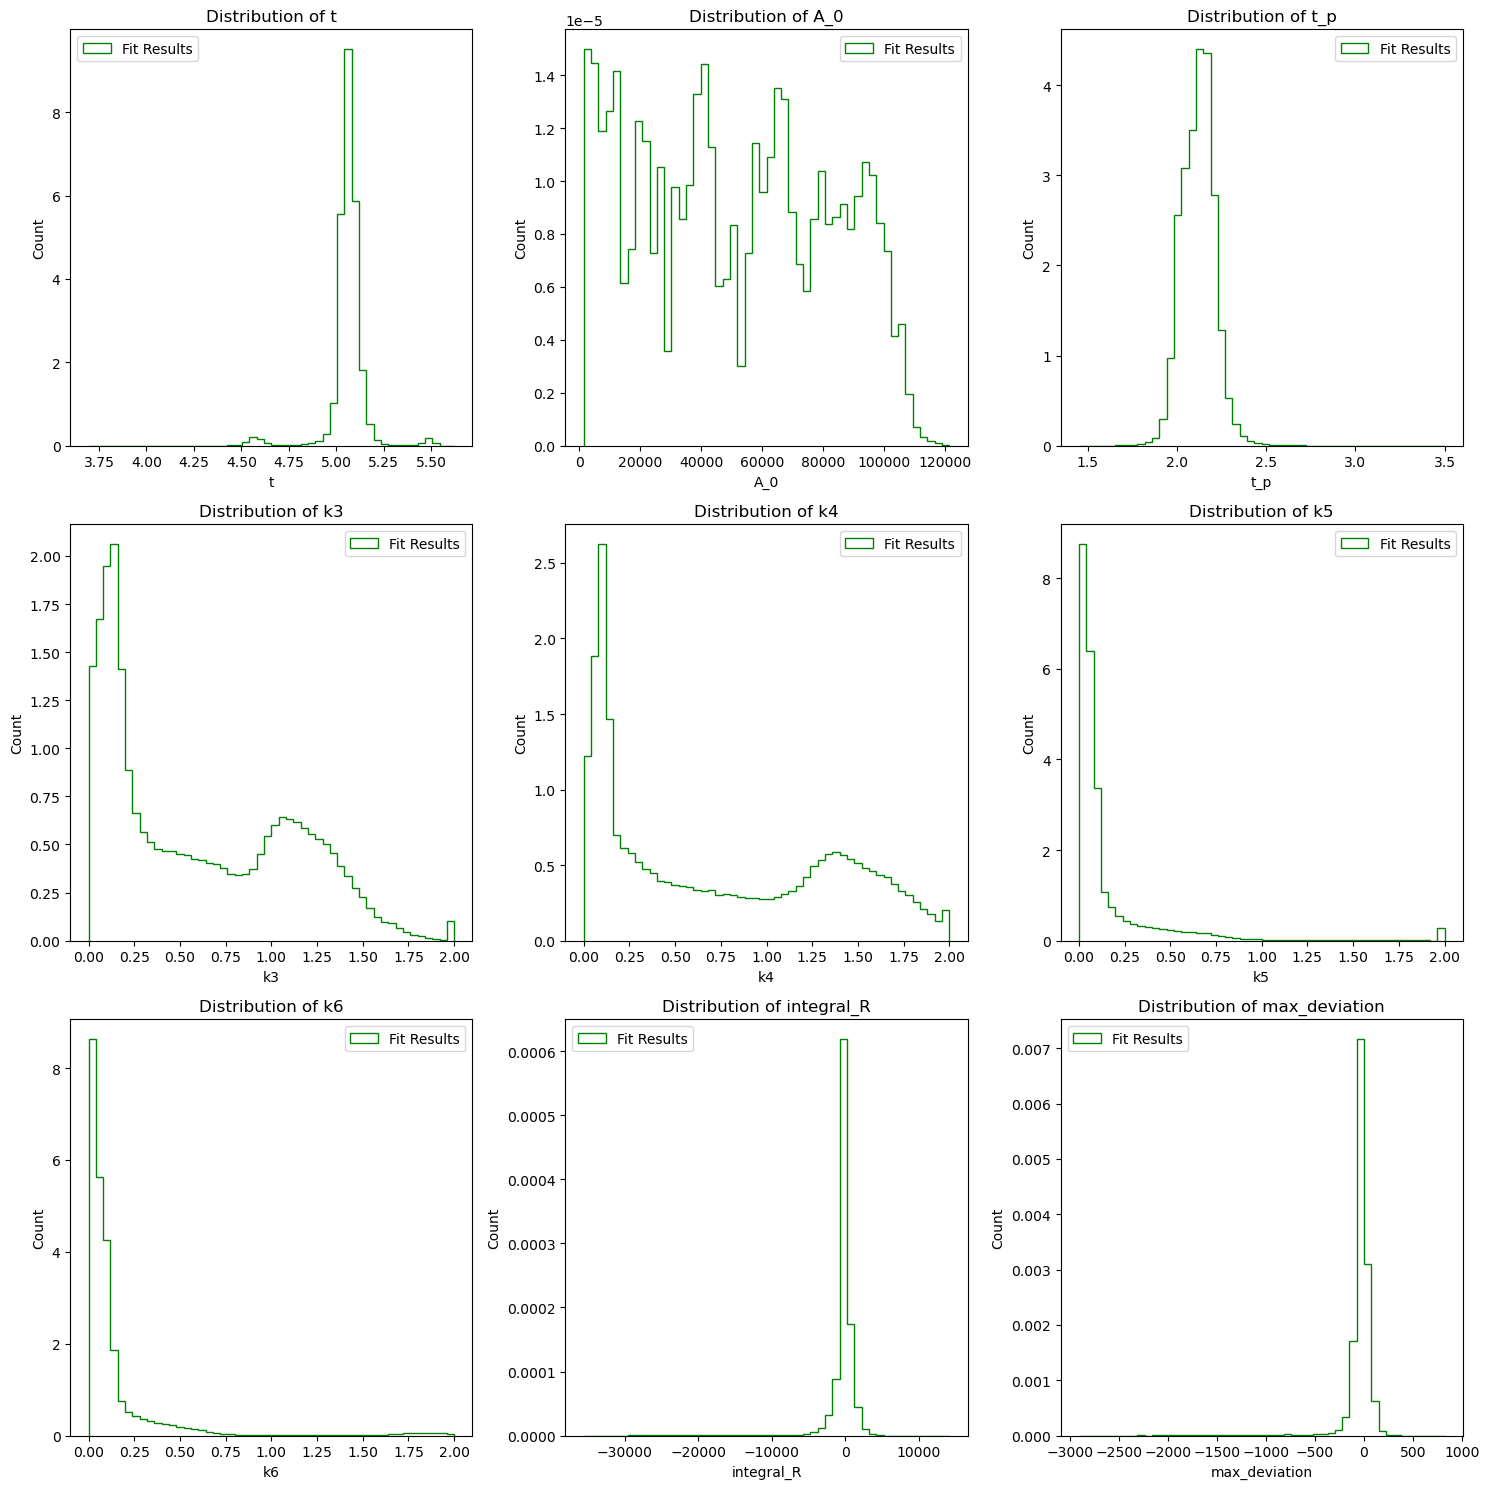

In [7]:
plot_dist_var_of_interests(onedf=fit_results_df, var_of_interests=var_of_interest)

In [8]:
fit_results_df

,Unnamed: 0,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,max_deviation,class
0,0,1,5.036608,0.010815,58149.92499,657.773824,2.101098,0.014967,0.687796,0.054839,0.765523,0.071406,6.282510e-10,0.000750,8.554779e-04,0.000035,5.621462,-801.597931,-110.022481,c1
1,1,5,5.033066,0.009833,65442.21629,321.151188,2.163375,0.011409,1.071410,0.018173,1.382715,0.026194,4.627720e-05,0.000764,3.210038e-04,0.000379,5.458553,-249.296821,-39.766805,c1
2,2,6,5.045837,0.010634,65550.13328,578.019579,2.224444,0.012035,1.107231,0.027788,1.402344,0.035287,2.231538e-02,0.003702,2.357800e-02,0.003810,5.670844,-553.260013,-56.517109,c1
3,3,8,5.030959,0.010160,59308.50169,441.930804,2.205569,0.011336,0.512251,0.012553,0.706559,0.014310,5.121085e-01,0.012546,4.221313e-01,0.006152,6.674477,-8.959887,-44.014384,c1
4,4,9,5.046673,0.009286,65508.44280,1516.530157,2.148614,0.010304,1.032886,0.017728,1.328450,0.026642,8.776150e-10,0.000483,2.108133e-04,0.000025,7.807859,-204.192975,-40.323056,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,10214,5.042379,0.023187,12209.22802,186.696036,2.069622,0.018616,0.107929,0.015699,0.154609,0.006707,1.078903e-01,0.015693,6.938065e-02,0.002754,3.551600,310.179494,11.500610,c4
10236,10236,10219,5.097440,0.021127,12594.68669,191.114975,1.973505,0.017210,0.045984,0.010335,0.031821,0.015302,2.297699e-02,0.009826,3.212867e-02,0.015249,3.768249,149.132218,12.348075,c4
10237,10237,10222,5.014641,0.025500,12541.50351,185.997540,2.210946,0.022918,0.134777,0.023089,0.211997,0.010720,1.347539e-01,0.023082,7.120209e-02,0.002340,2.821193,730.361894,30.978793,c4
10238,10238,10224,5.084971,0.014333,12535.79641,144.727426,2.114977,0.011220,0.196856,0.001064,0.192219,0.001069,1.255354e-04,0.001086,3.918387e-08,1.393269,3.816430,77.386167,7.880802,c4


In [9]:
def plot_dist_var_of_interests(dataframe_GPU, dataframe_FitRes, var_of_interests):
    print(len(dataframe_GPU), len(dataframe_FitRes))
    fig, ax = plt.subplots(3,3,figsize=(8*3, 8*3))
    for idx, var in enumerate(var_of_interests):
        row, col = divmod(idx, 3)
        # if ('integral' in var) or ('max_deviation' in var):
        ax[row, col].hist(dataframe_GPU[var], bins=20, histtype='step', color='b', label='GPU float32', density=True)
        # ax[row, col].hist(dataframe_CPU[var], bins=20, histtype='step', color='r', label='CPU float32: smearing off', density=True)
        ax[row, col].hist(dataframe_FitRes[var], bins=20, histtype='step', color='g', label='Fit Results', density=True)
        ax[row, col].set_title(f'Distribution of {var}')
        
        ax[row, col].set_xlabel(var)
        ax[row, col].set_yscale('log')
        ax[row, col].set_ylabel('Count')
        ax[row, col].legend()
        # else:
        #     # the values of the parameters are defined positive
        #     difference = dataframe_GPU[var] - dataframe_FitRes[var]
        #     ax[row, col].hist(difference, bins=20, histtype='step', color='b', label='GPU - Fit results', density=True)
        #     ax[row, col].set_title(f'Distribution of {var}')
        #     ax[row, col].set_xlabel(var)
        #     ax[row, col].set_ylabel('Count')
        #     ax[row, col].legend()
    plt.tight_layout()

    # fig, ax = plt.subplots(3,3,figsize=(5*3, 5*3))
    # for idx, var in enumerate(var_of_interests):
    #     row, col = divmod(idx, 3)
    #     # the values of the parameters are defined positive
    #     difference = dataframe_GPU[var] - dataframe_FitRes[var]
    #     ax[row, col].hist(difference, bins=20, histtype='step', color='b', label='GPU - Fit results', density=True)
    #     ax[row, col].set_title(f'Distribution of {var}')
    #     ax[row, col].set_xlabel(var)
    #     ax[row, col].set_ylabel('Count')
    #     ax[row, col].legend()
    # plt.tight_layout()

214879 143331


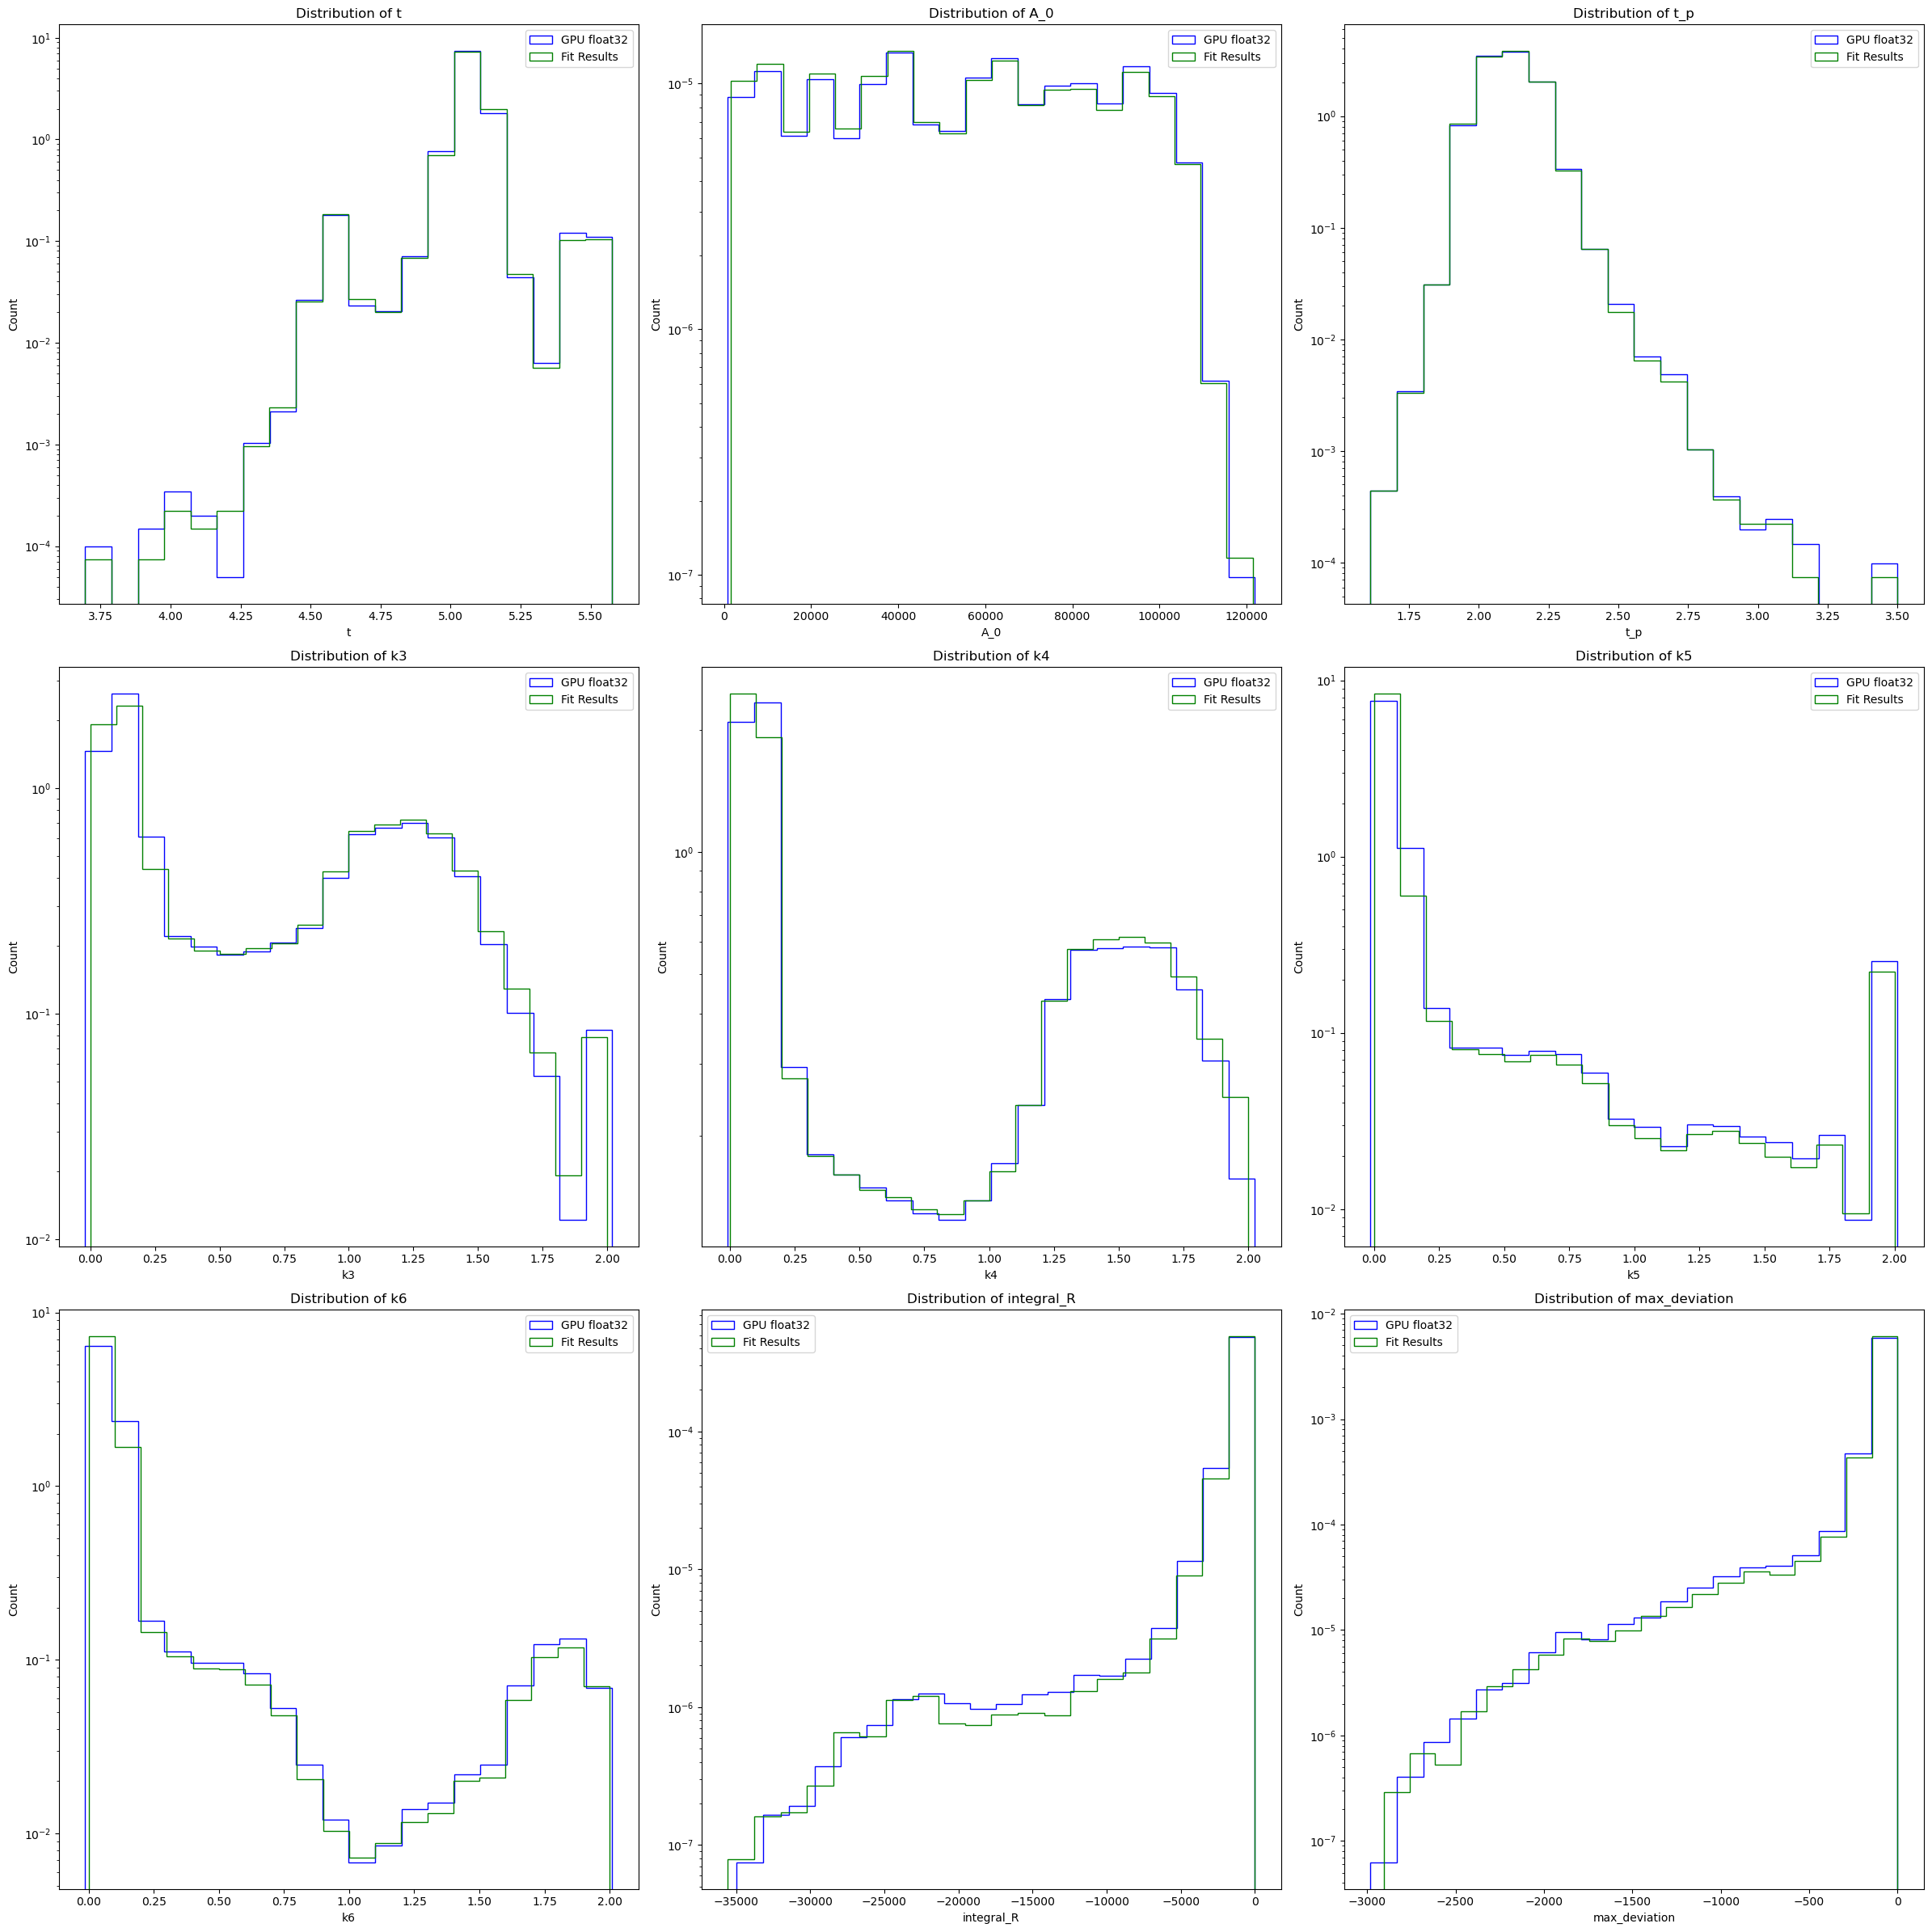

In [10]:
# read csv file
c2_df_gpu = pd.read_csv('data/labelledData/labelledData/generate_new_samples_c1.csv')
# c2_df_gpu = pd.read_csv('data/labelledData/labelledData_gpu/labelledData/generate_new_samples_c1_batchSize1_float32_labelled_tails_GPU_and_CPU.csv')
# c2_df_gpu = pd.read_csv('data/labelledData/labelledData_gpu/labelledData/generate_new_samples_c1_batchSize1_float32_labelled_tails_responseCPU_and_integralGPU.csv')
# c2_df_gpu = pd.read_csv('data/labelledData/labelledData_gpu/labelledData/generate_new_samples_c1_batchSize1_float32_labelled_tails.csv')
# c2_df_cpu = pd.read_csv('data/labelledData/labelledData_gpu/labelledData/generate_new_samples_c1_batchSize1_float32_labelled_tails_allonCPU.csv')
# c2_df_cpu = pd.read_csv('data/labelledData/labelledData_cpu/generated_new_samples_c1_labelled_tails.csv')
# c2_df_cpu = pd.read_csv('data/labelledData/labelledData/generated_new_samples_c1_labelled_tails_float32.csv')
# c2_df_gpu = pd.read_csv('data/labelledData/labelledData/generated_new_samples_c1_labelled_tails_notpreciseddtype.csv')
plot_dist_var_of_interests(dataframe_GPU=c2_df_gpu, dataframe_FitRes=fit_results_df[fit_results_df['class']=='c1'], var_of_interests=var_of_interest)

227480 5390


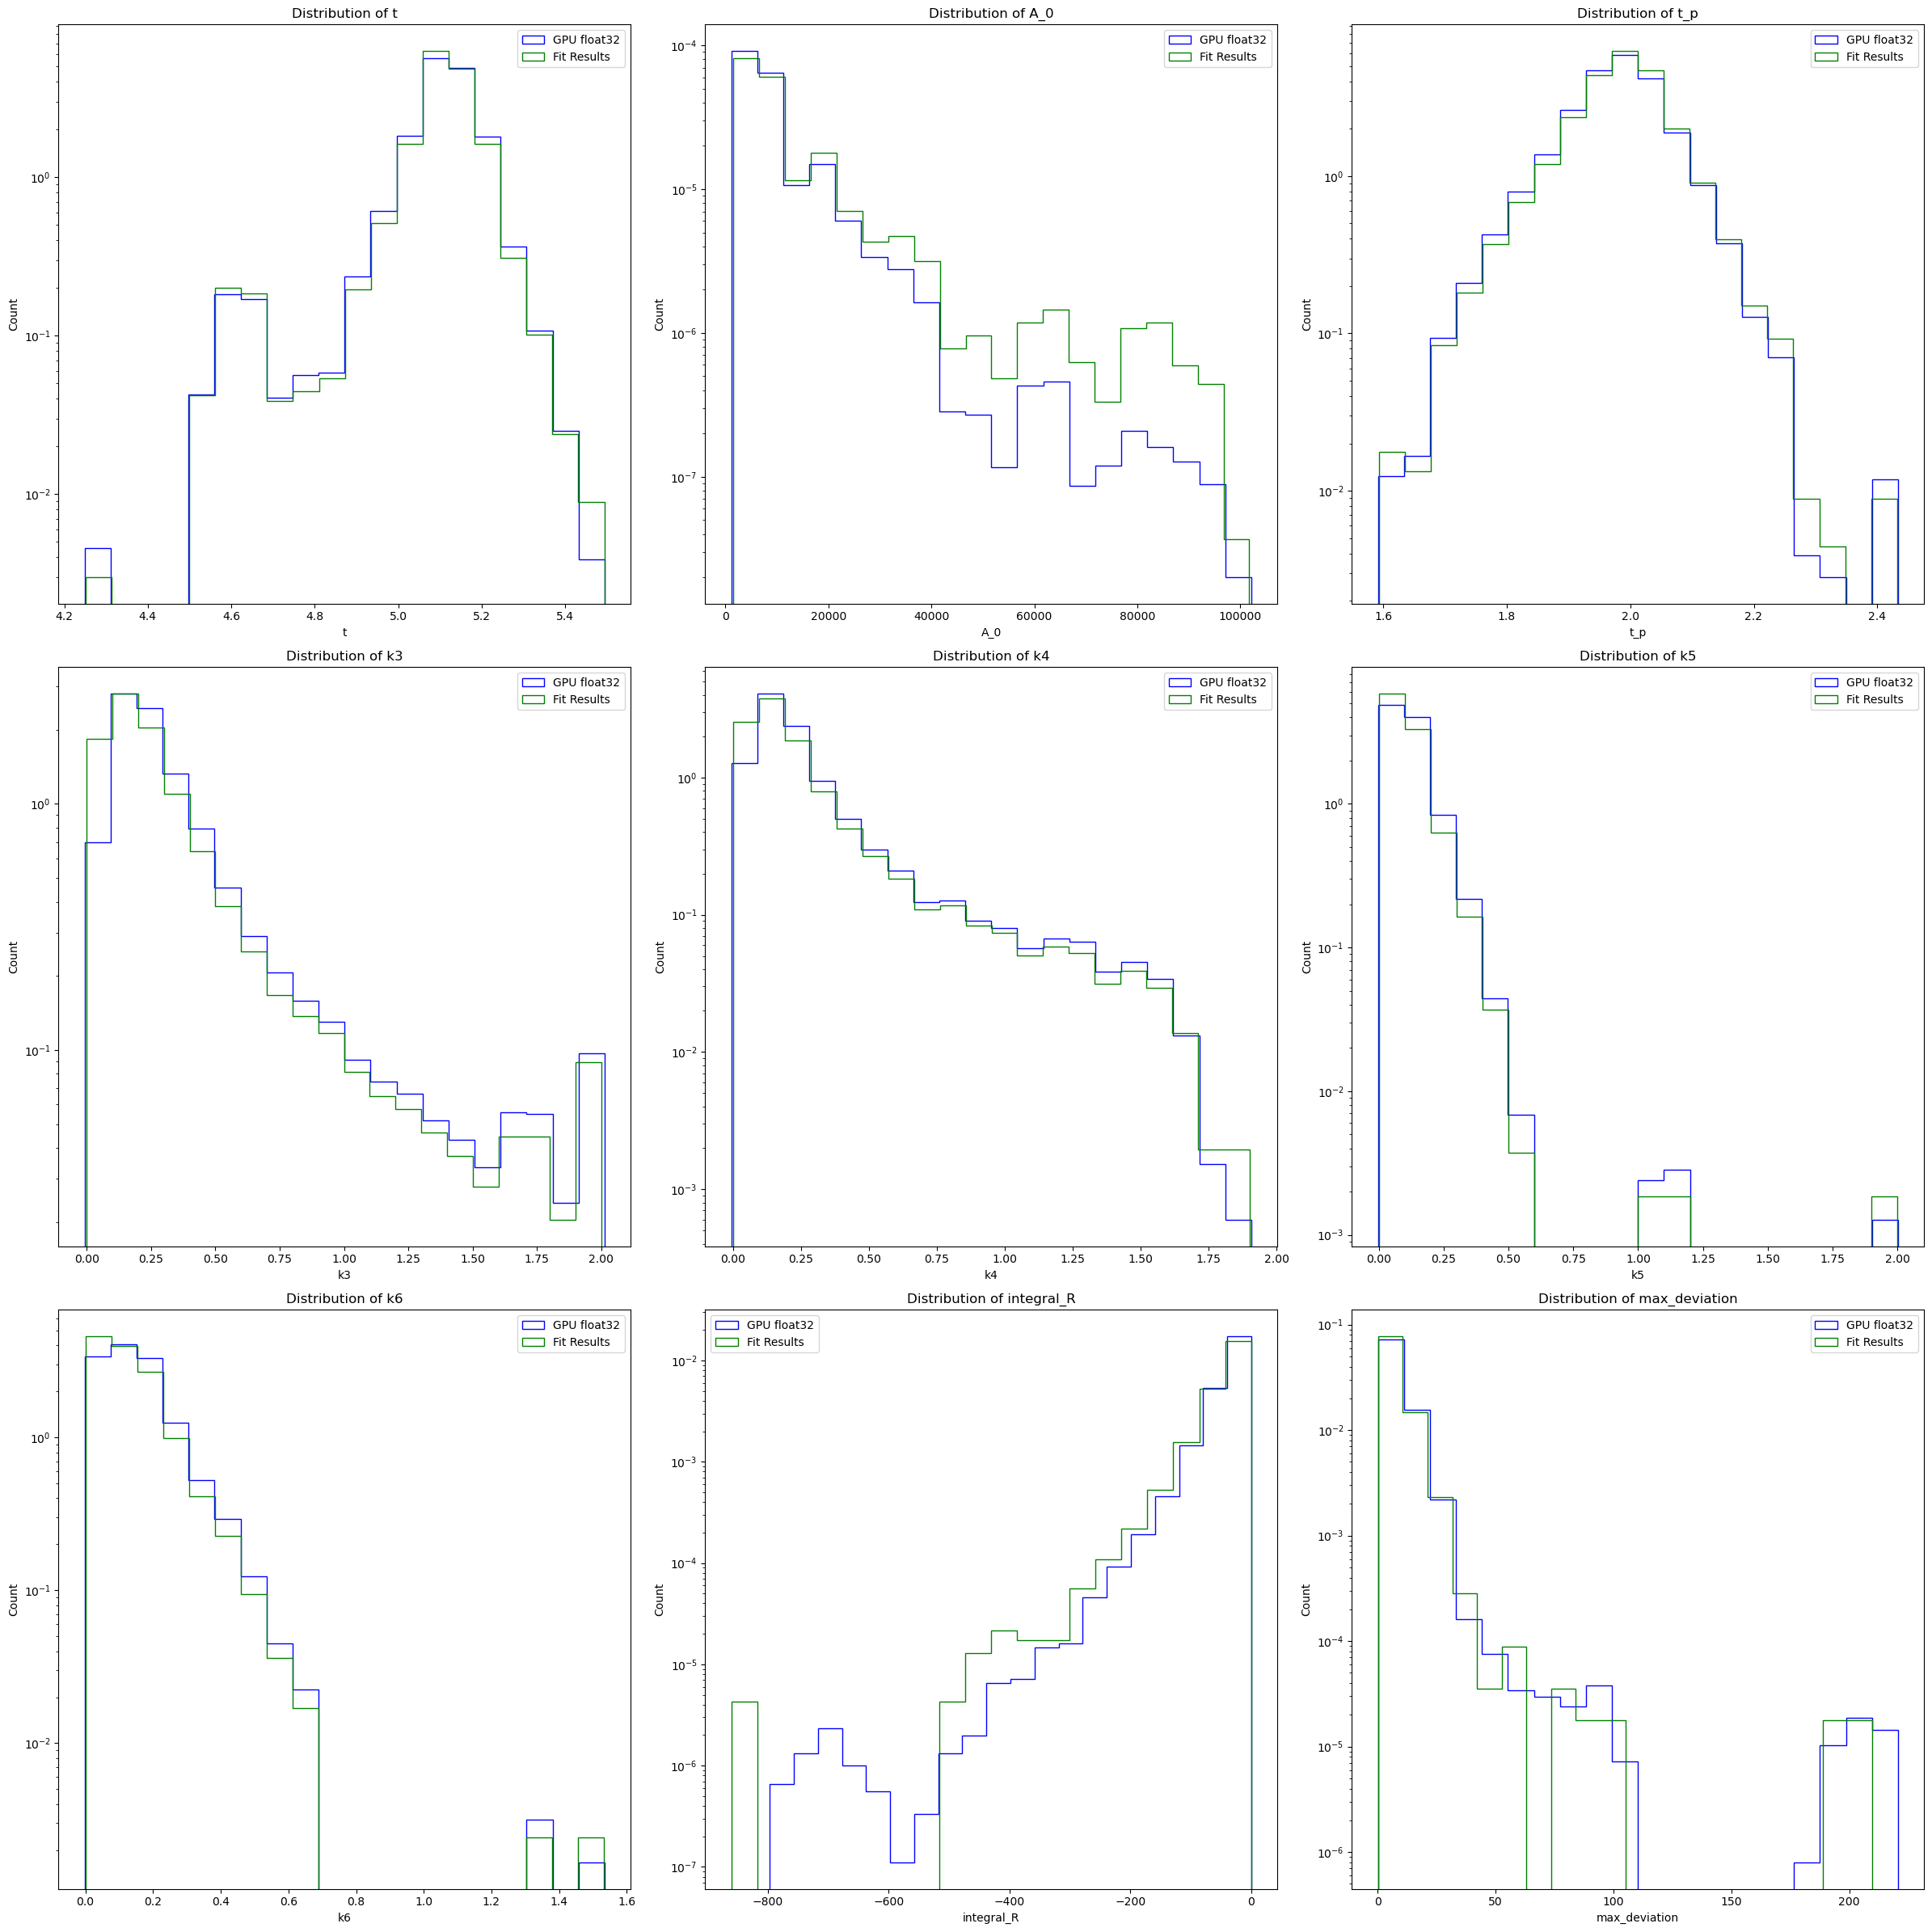

In [11]:
# read csv file
c2_df_gpu = pd.read_csv('data/labelledData/labelledData/generate_new_samples_c2.csv')
# c2_df_cpu = pd.read_csv('data/labelledData/labelledData_cpu/generatedSamples/generated_new_samples_c2_labelled_tails.csv')
plot_dist_var_of_interests(dataframe_GPU=c2_df_gpu, dataframe_FitRes=fit_results_df[fit_results_df['class']=='c2'], var_of_interests=var_of_interest)

201444 61858


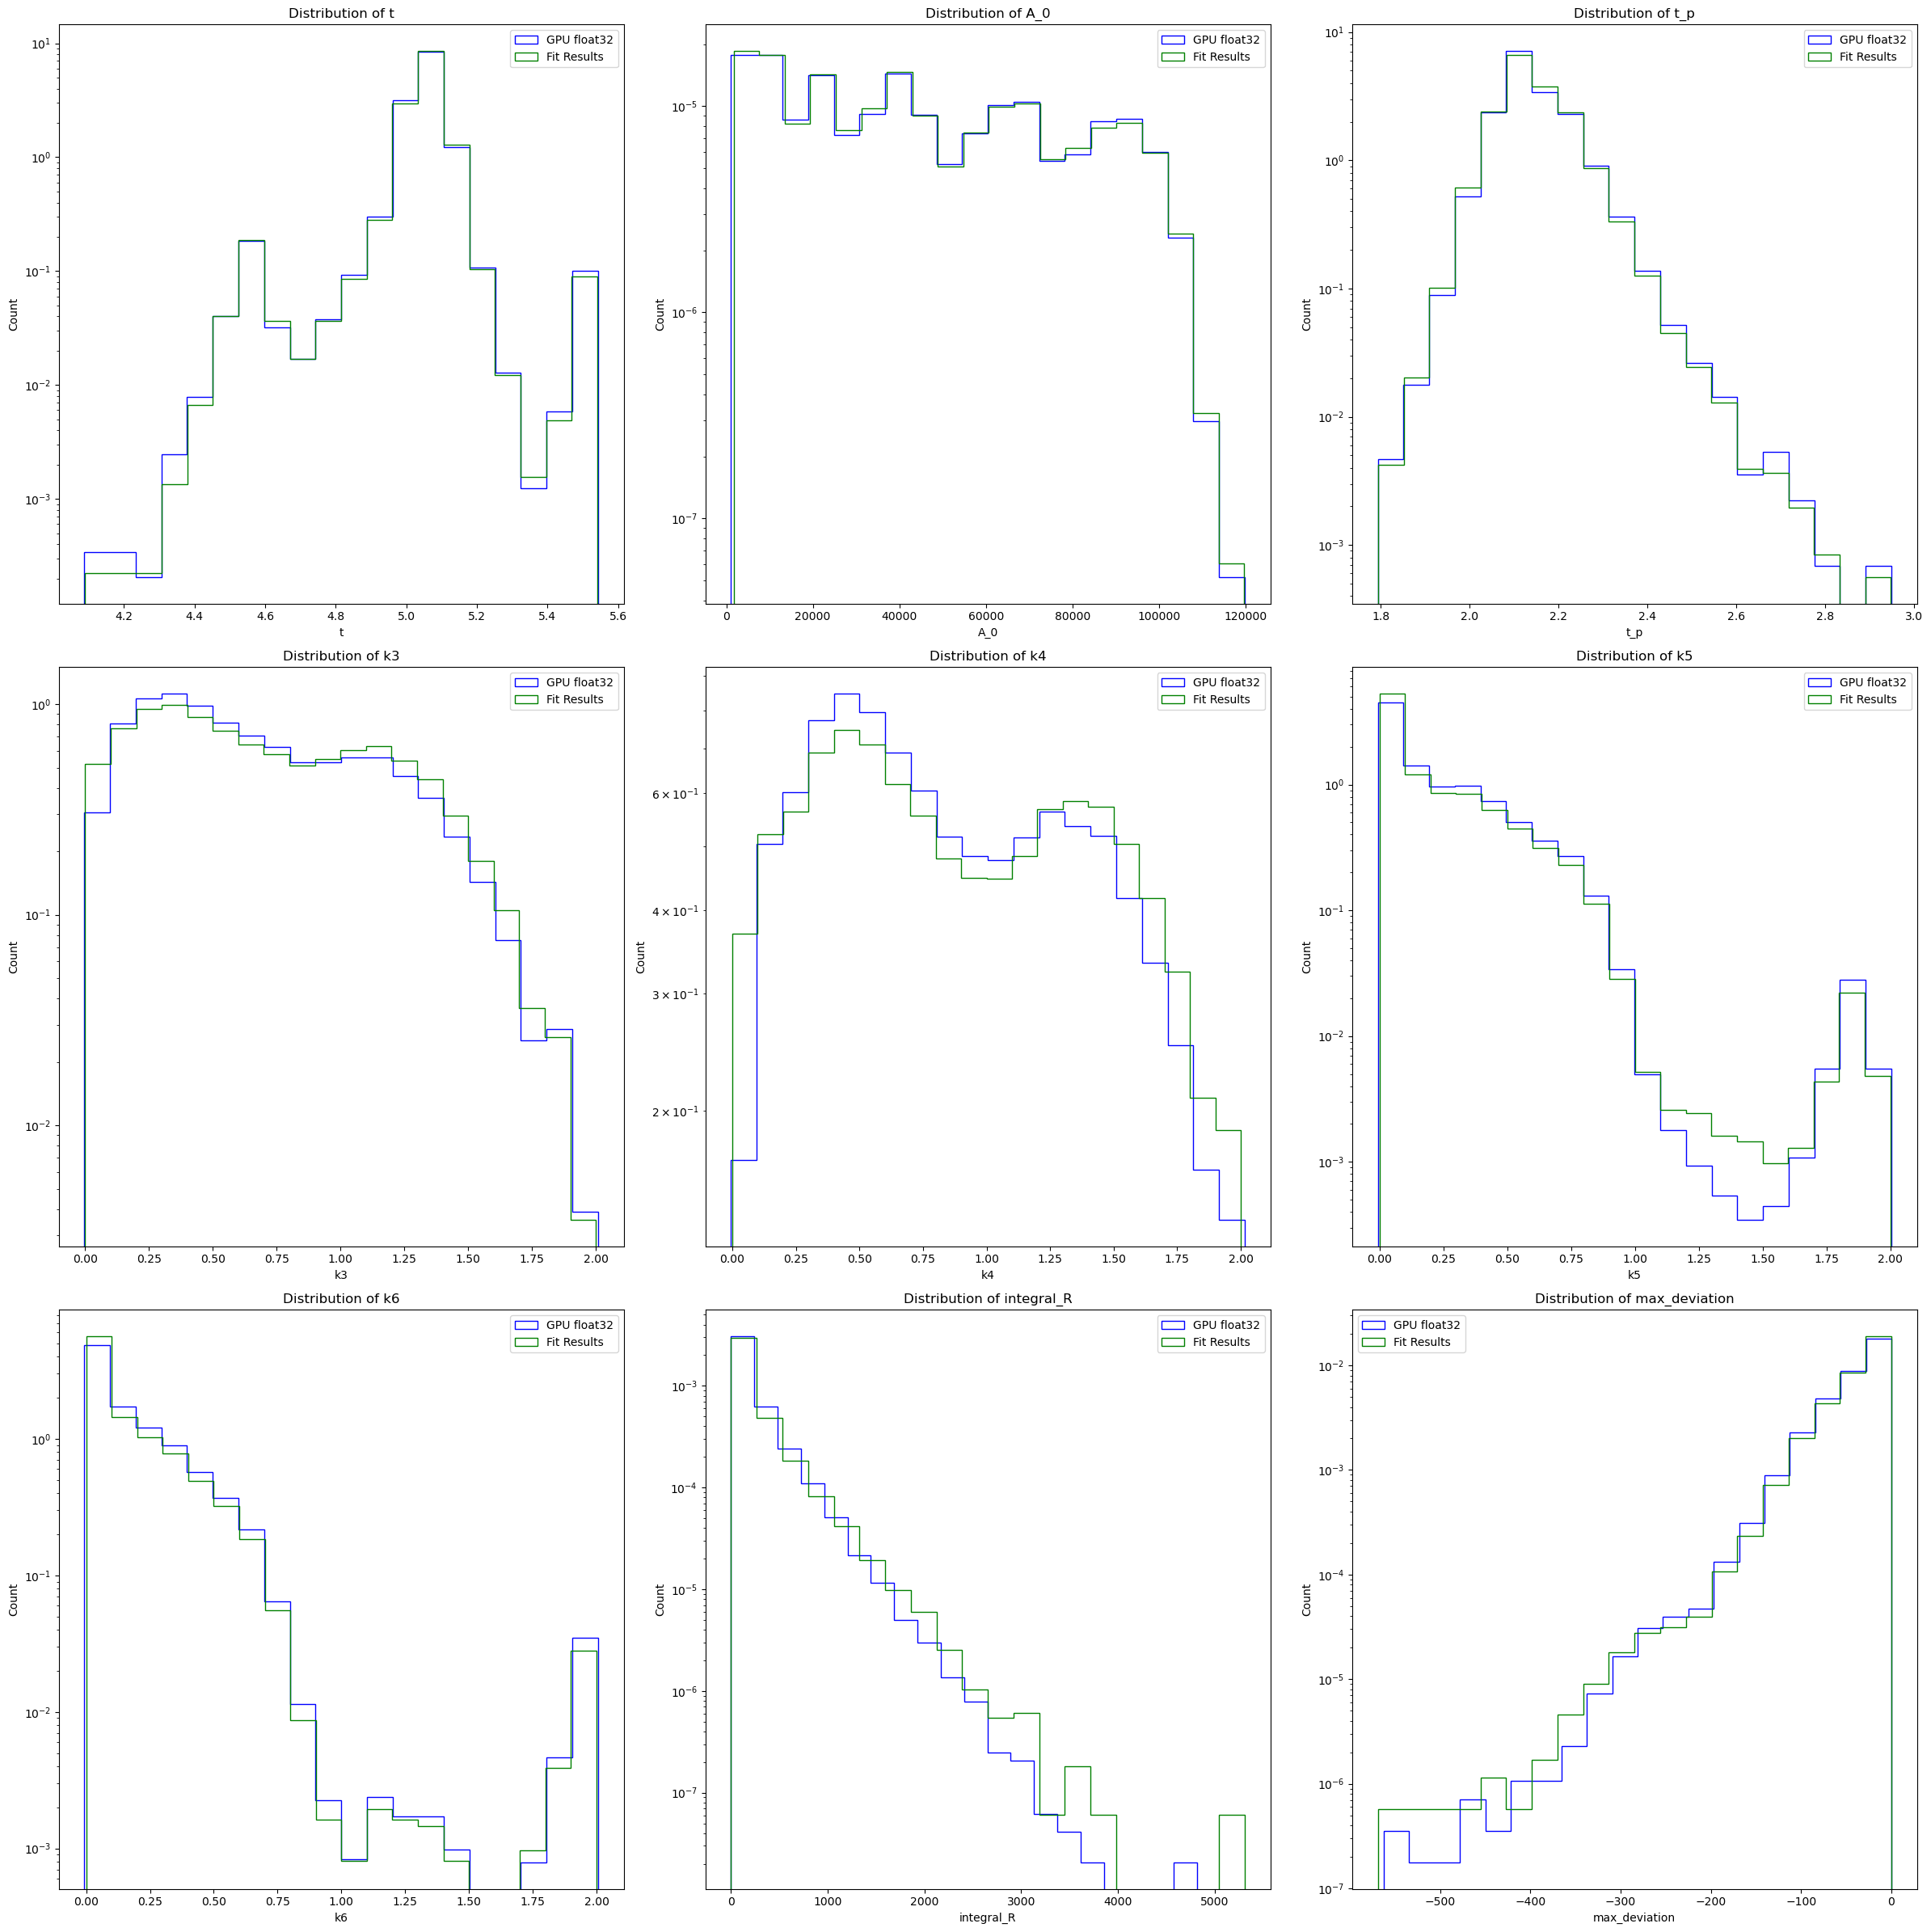

In [12]:
# read csv file
c2_df_gpu = pd.read_csv('data/labelledData/labelledData/generate_new_samples_c3.csv')
# c2_df_cpu = pd.read_csv('data/labelledData/labelledData_cpu/generatedSamples/generated_new_samples_c3_labelled_tails.csv')
plot_dist_var_of_interests(dataframe_GPU=c2_df_gpu, dataframe_FitRes=fit_results_df[fit_results_df['class']=='c3'], var_of_interests=var_of_interest)

222020 76137


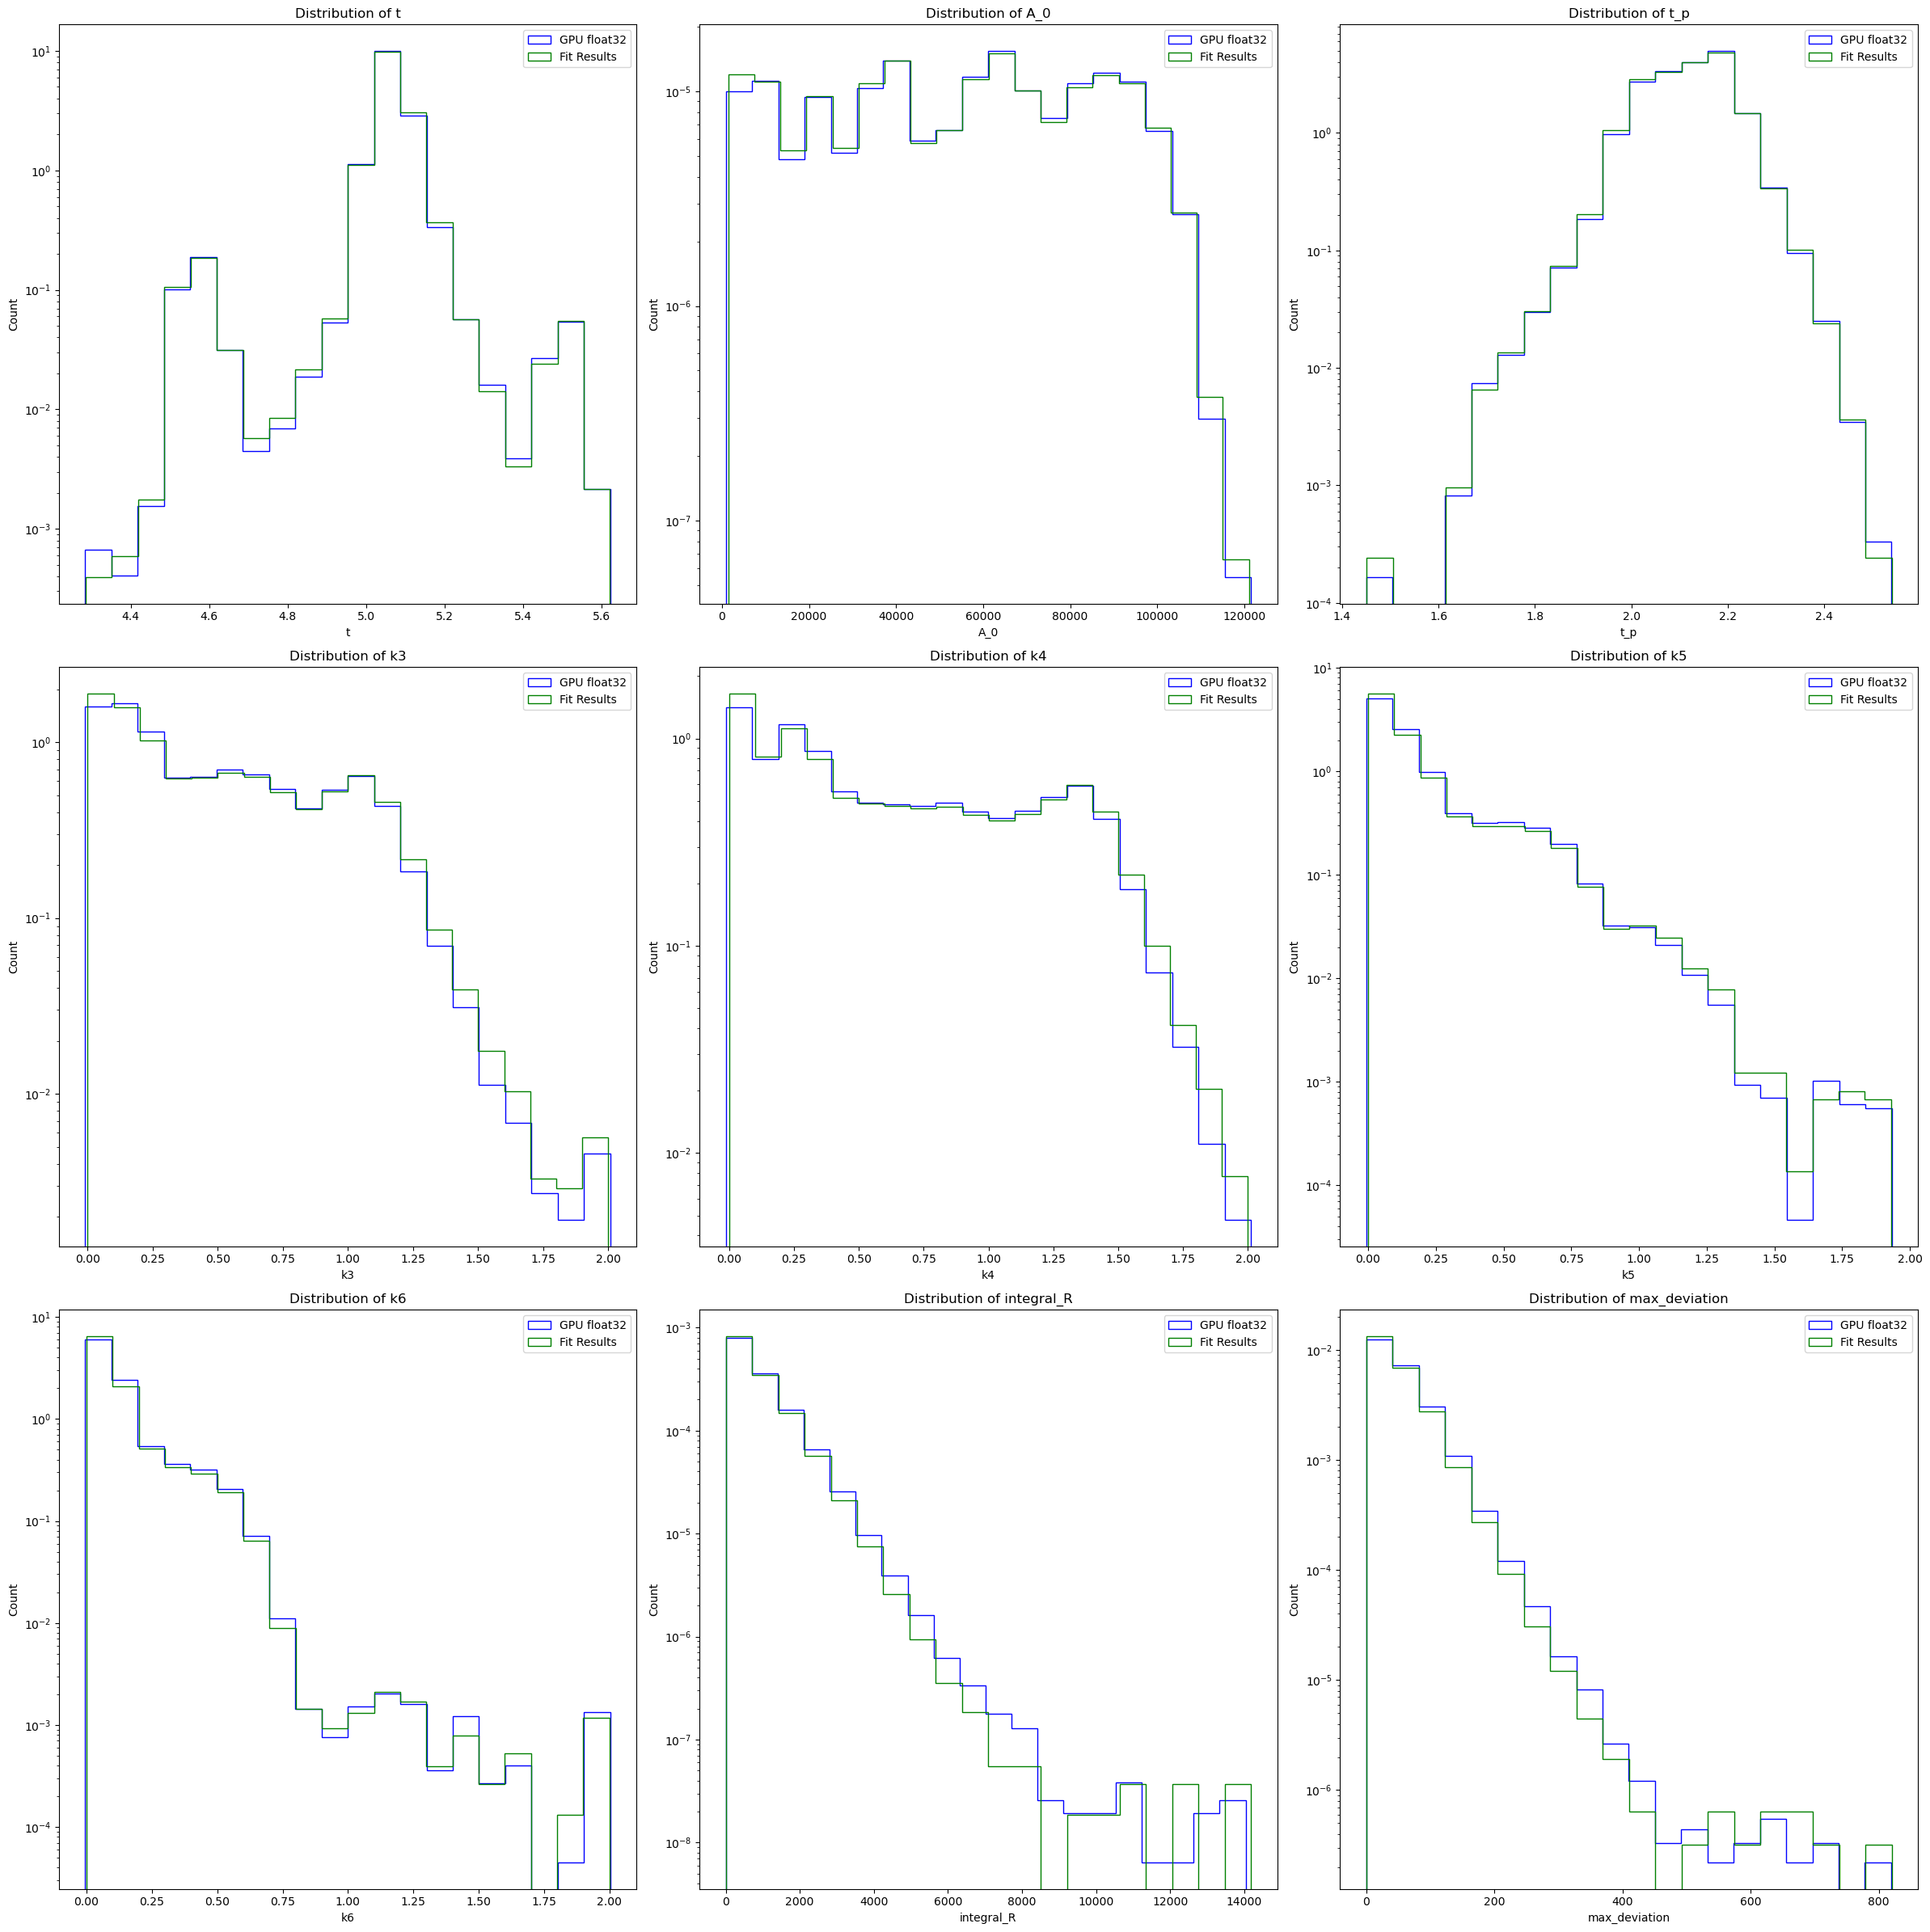

In [13]:
# read csv file
c2_df_gpu = pd.read_csv('data/labelledData/labelledData/generate_new_samples_c4.csv')
# c2_df_cpu = pd.read_csv('data/labelledData/labelledData_cpu/generatedSamples/generated_new_samples_c4_labelled_tails.csv')
plot_dist_var_of_interests(dataframe_GPU=c2_df_gpu, dataframe_FitRes=fit_results_df[fit_results_df['class']=='c4'], var_of_interests=var_of_interest)

-----------------

In [311]:
data = pd.read_csv('data/run_30413/fit_results_run_30413_no_avg.txt', sep='\t')
data.columns = data.columns.str.strip().str.replace(' ', '')
data.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF
0,5.008733,0.009035,83064.54115,631.653,2.250056,0.012383,0.431505,0.043863,0.690926,0.019752,0.431485,0.043861,0.322236,0.005990,10.837975,NaN
1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,0.024367,0.065162,0.003971,0.066870,0.004085,11.788794,NaN
2,5.028058,0.008975,82152.01742,665.526,2.212939,0.012120,0.475459,0.115498,0.700305,0.027182,0.475393,0.115472,0.377476,0.011649,7.817971,NaN
3,5.050278,0.008644,77046.19645,449.523,2.043111,0.007093,0.161044,0.002370,0.253107,0.004593,0.161035,0.002370,0.099146,0.001443,6.091413,NaN
4,5.020794,0.008312,88855.94059,7188.340,2.269399,0.010159,0.900172,0.015525,1.179171,0.026359,0.065855,0.005066,0.063880,0.004908,7.904888,NaN


### Classification based on Tail

In [312]:
# shift data columns to the right
columns = data.columns
data = data.reset_index()
data.drop(columns[-1], axis=1, inplace=True)
data.columns = columns
data.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF
0,0,5.008733,0.009035,83064.54115,631.653,2.250056,0.012383,0.431505,0.043863,0.690926,0.019752,0.431485,0.043861,0.322236,0.005990,10.837975
1,1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,0.024367,0.065162,0.003971,0.066870,0.004085,11.788794
2,2,5.028058,0.008975,82152.01742,665.526,2.212939,0.012120,0.475459,0.115498,0.700305,0.027182,0.475393,0.115472,0.377476,0.011649,7.817971
3,3,5.050278,0.008644,77046.19645,449.523,2.043111,0.007093,0.161044,0.002370,0.253107,0.004593,0.161035,0.002370,0.099146,0.001443,6.091413
4,4,5.020794,0.008312,88855.94059,7188.340,2.269399,0.010159,0.900172,0.015525,1.179171,0.026359,0.065855,0.005066,0.063880,0.004908,7.904888


In [313]:
nstd = 50
condition = (data['k3']>=-nstd*data['E(k3)'])&(data['k3']<=nstd*data['E(k3)']) & (data['k4']>=-nstd*data['E(k4)'])&(data['k4']<=nstd*data['E(k4)']) & (data['k5']>=-nstd*data['E(k5)'])&(data['k5']<=nstd*data['E(k5)']) & (data['k6']>=-nstd*data['E(k6)'])&(data['k6']<=nstd*data['E(k6)'])

In [314]:
tmpdata = data[condition].copy().reset_index().drop('index', axis=1)
response_params = ['t', 'A_0', 't_p', 'k3', 'k4', 'k5', 'k6']

In [315]:
x = np.linspace(tmpdata['t'].iloc[2152], tmpdata['t'].iloc[2152]+70, 70)
par0 = list(tmpdata[response_params].iloc[2152])


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6722/432241104.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')


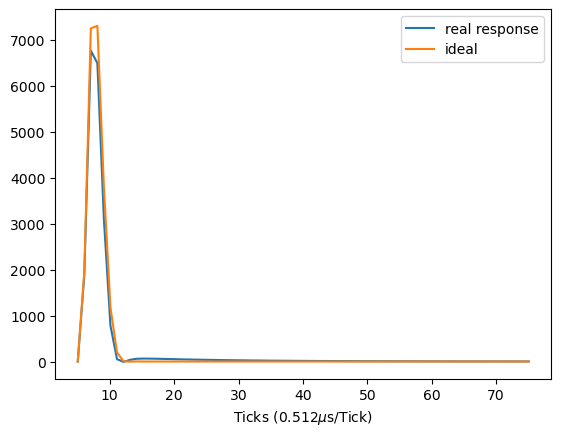

In [316]:
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

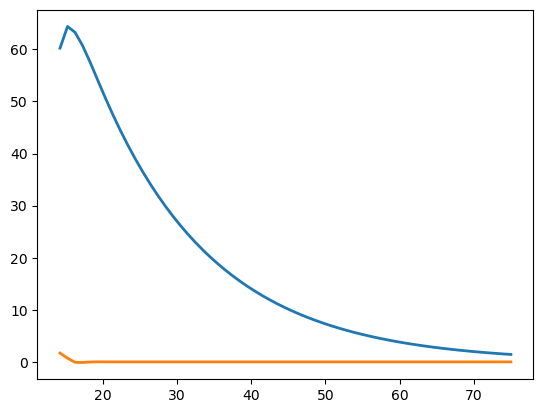

In [317]:
pos_peak = np.argmax(R)
# considering the peak time is 2us and each tick corresponds to 0.512 us, there are at most 5 ticks from the peak to the pedestal.
xtail = x[pos_peak+7:]
plt.figure()
plt.plot(x[pos_peak+7:], R[pos_peak+7:], linewidth=2)
plt.plot(xtail, R_ideal[pos_peak+7:], linewidth=2)
plt.show()

In [318]:
from scipy import interpolate

def find_intersection(x1, y1, x2, y2):
    """
    Find intersection of two curves using interpolation
    
    Parameters:
    x1, y1: coordinates of first curve
    x2, y2: coordinates of second curve
    
    Returns:
    x, y: coordinates of intersection point
    """
    # Create interpolation functions for both curves
    f1 = interpolate.interp1d(x1, y1)
    f2 = interpolate.interp1d(x2, y2)
    
    # Find the overlapping x-range
    x_min = max(x1.min(), x2.min())
    x_max = min(x1.max(), x2.max())
    
    # Create array of x-values to search for intersection
    x = np.linspace(x_min, x_max, 10000)
    
    # Calculate y-values for both functions
    y1_interp = f1(x)
    y2_interp = f2(x)
    
    # # Find where the difference is closest to zero
    idx = np.argmin(np.abs(y1_interp - y2_interp))
   
    return x[idx], y1_interp[idx]

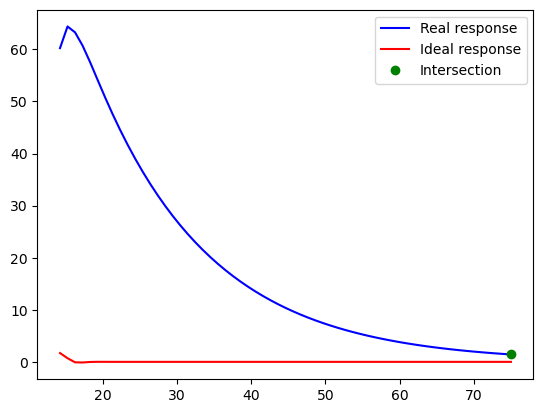

In [319]:
x1 = x[pos_peak+7:]
y1 = R[pos_peak+7:]
x2 = x[pos_peak+7:]
y2 = R_ideal[pos_peak+7:]

# Find intersection
x_intersect, y_intersect = find_intersection(x1,y1,x2, y2)
# mask = x1 <= x_intersect
mask = x1==x1
# Plot the results
plt.plot(x1[mask], y1[mask], 'b-', label='Real response')
plt.plot(x2[mask], y2[mask], 'r-', label='Ideal response')
plt.plot(x_intersect, y_intersect, 'go', label='Intersection')
# plt.plot(x,R)
plt.legend()
plt.show()

In [320]:
from scipy import integrate

def local_average_convolve(arr, window_size=3):
    # create weights for averaging
    weights = np.ones(window_size) / window_size
    # calculate moving average
    avg = np.convolve(arr, weights, mode='valid')
    return avg

integrals_R_selected = []
integrals_R_ideal_selected = []
max_deviations = []
time_peaks_diff = []
peak_differences = []
for i in range(len(tmpdata)):
    x = np.linspace(tmpdata['t'].iloc[i], tmpdata['t'].iloc[i]+70, 70)
    par0 = list(tmpdata[response_params].iloc[i])
    # try:
    # calculate the response
    R = response(x=x, par=par0)
    R_ideal = response_legacy(x=x, par=par0)
    # find peak in ideal response
    pos_peak = np.argmax(R_ideal)
    # considering the peak time is 2us and each tick corresponds to 0.512 us, there are at most 5 ticks from the peak to the pedestal.
    xtail = x[pos_peak+6:]
    # find intersection
    x1 = x[pos_peak+6:]
    y1 = R[pos_peak+6:]
    x2 = x[pos_peak+6:]
    y2 = R_ideal[pos_peak+6:]
    x_intersect, y_intersect = find_intersection(x1,y1,x2, y2)
    # select data between pos_peak+6 and x_intersect
    mask = x1 <= x_intersect
    x_selected = x1[mask]
    R_selected = y1[mask]
    R_ideal_selected = y2[mask]
    integral_R_selected = integrate.simpson(x=x_selected, y=R_selected)
    integral_R_ideal_selected = integrate.simpson(x=x_selected, y=R_ideal_selected)
    integrals_R_selected.append(integral_R_selected)
    integrals_R_ideal_selected.append(integral_R_ideal_selected)
    #
    # Deviation between the ideal and real responses:
    R_avg = local_average_convolve(R, 2)
    x_avg = local_average_convolve(x, 2)
    R_ideal_avg = local_average_convolve(R_ideal, 2)
    deviations = np.abs(R_avg - R_ideal_avg)
    # deviations = R_avg - R_ideal_avg
    max_deviation = np.max(deviations)
    max_deviations.append(max_deviation)
    time_peaks_diff.append(x[np.argmax(R)] - x[pos_peak])
max_deviations = np.array(max_deviations) / np.max(max_deviations) # maximum deviation normalized to 1


/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in exp
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp(k6*t)*(k4 - k6)*(k6 - p0)*(pow(k6,2) + pow(pi1,2) - 2*k6*pr1 + pow(pr1,2))*(pow(k6,2) + pow(pi2,2) - 2*k6*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in exp
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp(k6*t)*(k4 - k6)*(k6 - p0)*(pow(k6,2) + pow(pi1,2) - 2*k6*pr1 + pow(pr1,2))*(pow(k6,2) + pow(pi2,2) - 2*k6*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in exp
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp(k6*t)*(k4 - k6)*(k6 - p0)*(pow(k6,2) + pow(pi1,2) - 2*k6*pr1 + pow(pr1,2))*(pow(k6,2) + pow(pi2,2) - 2*k6*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in exp
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp(k6*t)*(k4 - k6)*(k6 - p0)*(pow(

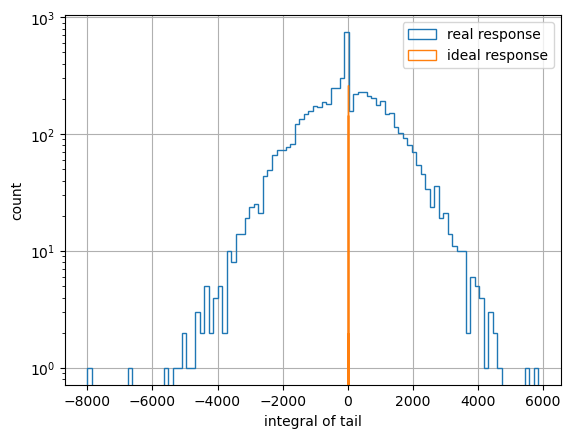

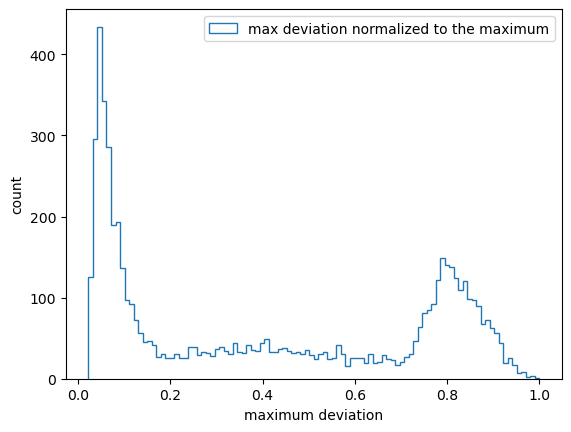

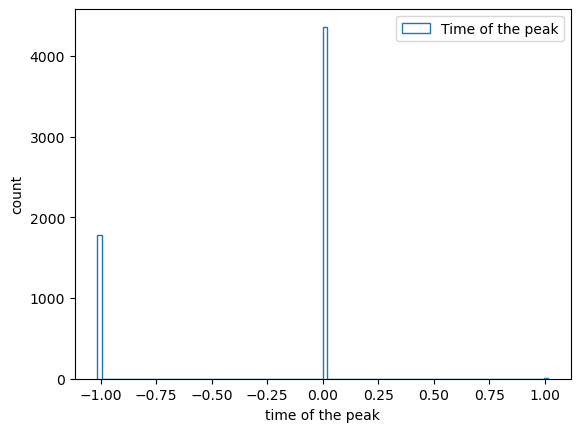

In [321]:
plt.figure()
plt.hist(integrals_R_selected, bins=100, histtype='step', label='real response')
plt.hist(integrals_R_ideal_selected, bins=100, histtype='step', label='ideal response')
plt.xlabel('integral of tail')
plt.ylabel('count')
plt.yscale('log')
# plt.xlim([-2, 10])
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.hist(max_deviations, bins=100, histtype='step', label='max deviation normalized to the maximum')
plt.xlabel('maximum deviation')
plt.ylabel('count')
plt.legend()
plt.show()

plt.figure()
plt.hist(time_peaks_diff, bins=100, histtype='step', label='Time of the peak')
plt.xlabel('time of the peak')
plt.ylabel('count')
plt.legend()
plt.show()

In [322]:
tmpdata['integral_R'] = integrals_R_selected
tmpdata['integral_ideal'] = integrals_R_ideal_selected
tmpdata['max_deviation'] = max_deviations
tmpdata['time_peak'] = time_peaks_diff

### Classification based on the integral of the tail

In [323]:
ideal_df0 = tmpdata[tmpdata['integral_R']==tmpdata['integral_ideal']].copy().reset_index().drop('index', axis=1)
undershoot_df0 = tmpdata[tmpdata['integral_R']<tmpdata['integral_ideal']].copy().reset_index().drop('index', axis=1)
overshoot_df0 = tmpdata[tmpdata['integral_R']>tmpdata['integral_ideal']].copy().reset_index().drop('index', axis=1)

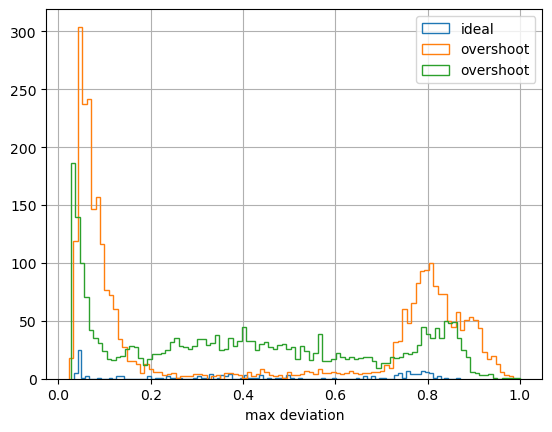

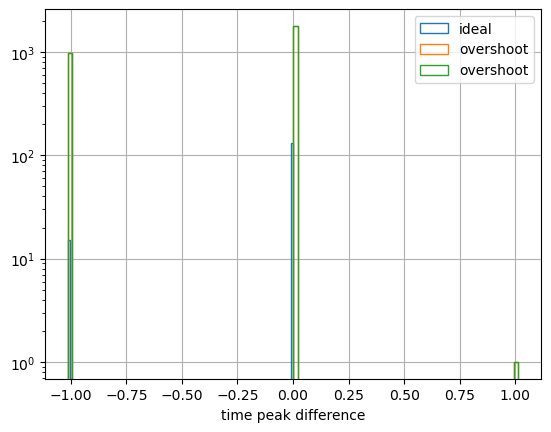

In [324]:
plt.figure()
ideal_df0['max_deviation'].hist(bins=100, histtype='step', label='ideal')
undershoot_df0['max_deviation'].hist(bins=100, histtype='step', label='overshoot')
overshoot_df0['max_deviation'].hist(bins=100, histtype='step', label='overshoot')
plt.xlabel('max deviation')
plt.legend()
plt.show()

plt.figure()
ideal_df0['time_peak'].hist(bins=100, histtype='step', label='ideal')
overshoot_df0['time_peak'].hist(bins=100, histtype='step', label='overshoot')
overshoot_df0['time_peak'].hist(bins=100, histtype='step', label='overshoot')
plt.xlabel('time peak difference')
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

#### Select ideal : pre-selected ideal and those with maximum difference <= 0.1 and time peak difference ==0

In [325]:
mask_ideal_class0 = (ideal_df0['max_deviation']<=0.1) & (ideal_df0['time_peak']==0)
mask_ideal_class1 = (ideal_df0['max_deviation']> 0.1) | ((ideal_df0['max_deviation']<=0.1) & (ideal_df0['time_peak']!=0))
# ideal_df = ideal_df0[(ideal_df0['max_deviation']<=0.1) & (ideal_df0['time_peak']==0)].copy().reset_index().drop('index', axis=1)
ideal_df = ideal_df0.copy()
ideal_df.loc[mask_ideal_class0, 'class'] = 'ideal_class0'
ideal_df.loc[mask_ideal_class1, 'class'] = 'ideal_class1'

In [326]:
other_ideal = ideal_df0[~ideal_df0['#Ch.#'].isin(ideal_df['#Ch.#'])].copy()

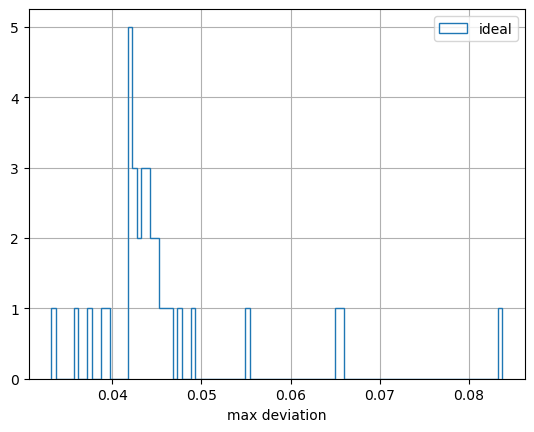

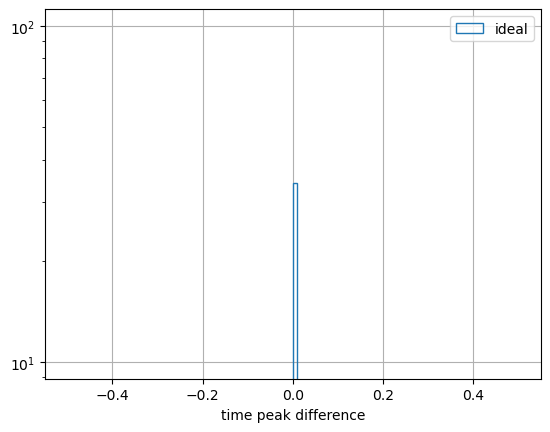

In [327]:
plt.figure()
ideal_df[mask_ideal_class0]['max_deviation'].hist(bins=100, histtype='step', label='ideal')
plt.xlabel('max deviation')
plt.legend()
plt.show()

plt.figure()
ideal_df[mask_ideal_class0]['time_peak'].hist(bins=100, histtype='step', label='ideal')
plt.xlabel('time peak difference')
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

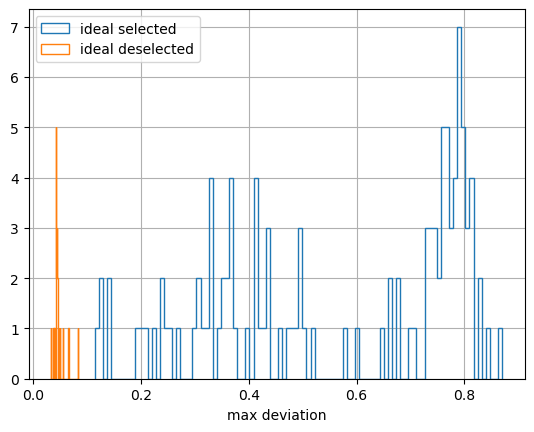

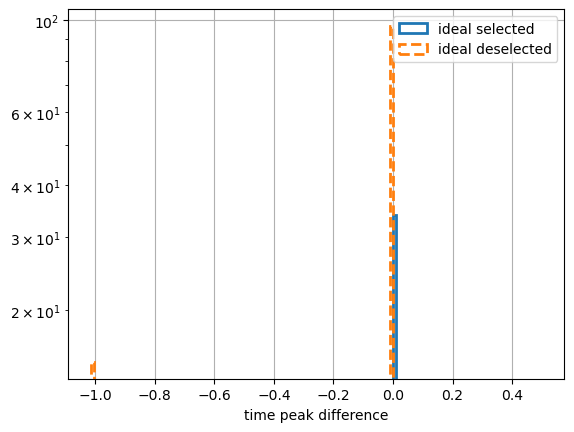

In [328]:
plt.figure()
ideal_df[mask_ideal_class1]['max_deviation'].hist(bins=100, histtype='step', label='ideal selected')
ideal_df[mask_ideal_class0]['max_deviation'].hist(bins=100, histtype='step', label='ideal deselected')
plt.xlabel('max deviation')
plt.legend()
plt.show()

plt.figure()
ideal_df[mask_ideal_class0]['time_peak'].hist(bins=100, histtype='step', label='ideal selected',linewidth=2)
ideal_df[mask_ideal_class1]['time_peak'].hist(bins=100, histtype='step', label='ideal deselected', ls='--', linewidth=2)
plt.xlabel('time peak difference')
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [329]:
ideal_df.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,...,k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,integral_ideal,max_deviation,time_peak,class
0,27,5.026208,0.009095,77397.44901,513.901,2.120217,0.011064,0.461558,0.023110,0.541846,...,0.084142,0.003332,0.075697,0.002791,6.949847,0.0,0.0,0.359610,0.0,ideal_class1
1,29,5.020406,0.009001,78109.25518,591.148,2.138809,0.011979,0.561821,0.025246,0.662031,...,0.051719,0.002366,0.045847,0.002085,5.100328,0.0,0.0,0.427803,0.0,ideal_class1
2,30,5.032076,0.009131,77888.92272,510.013,2.094083,0.010768,0.441545,0.023579,0.512535,...,0.062798,0.002715,0.054859,0.002260,3.084513,0.0,0.0,0.326275,0.0,ideal_class1
3,234,5.035825,0.008914,79029.88703,504.602,2.125513,0.010632,0.491507,0.027460,0.566600,...,0.107775,0.007456,0.101695,0.006645,5.240735,0.0,0.0,0.352626,0.0,ideal_class1
4,244,5.047859,0.009059,76720.65087,537.404,2.131137,0.011350,0.553060,0.030174,0.624168,...,0.055746,0.003920,0.052583,0.003658,4.399844,0.0,0.0,0.326069,0.0,ideal_class1


class0: perfect <br/>
class1: close to ideal <br>
class number: the higher the worst

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6722/3035355485.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')


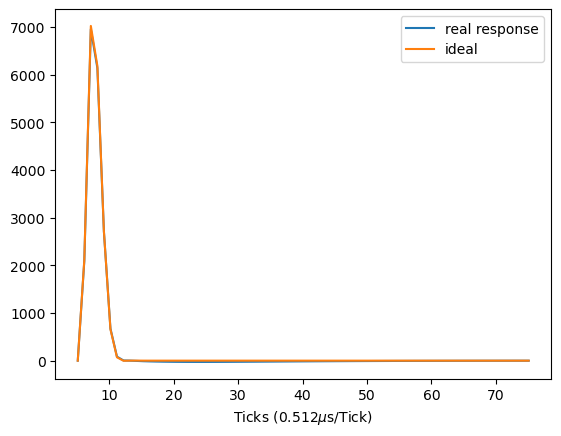

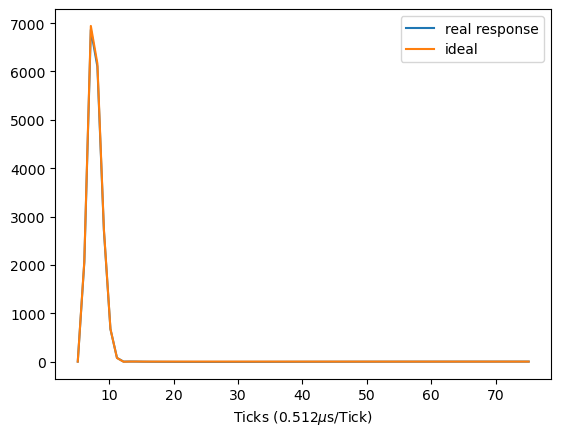

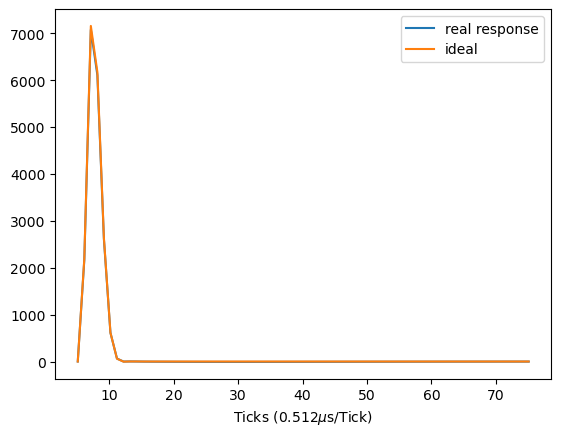

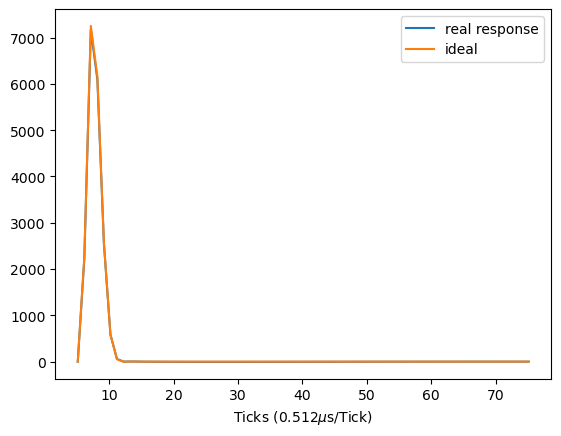

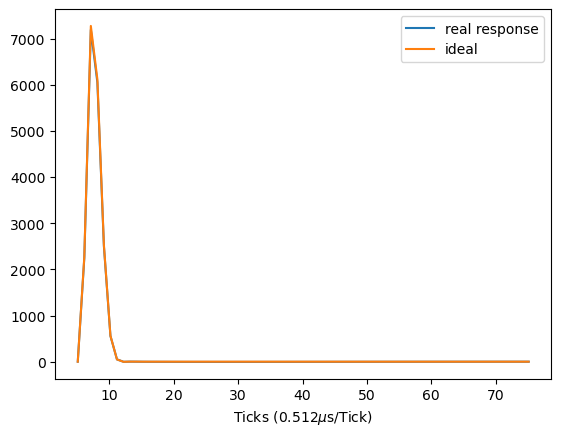

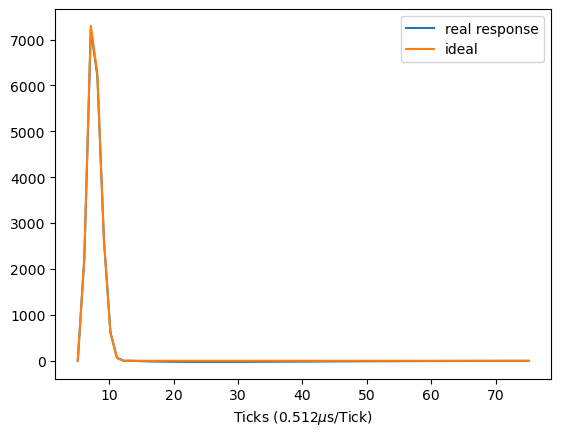

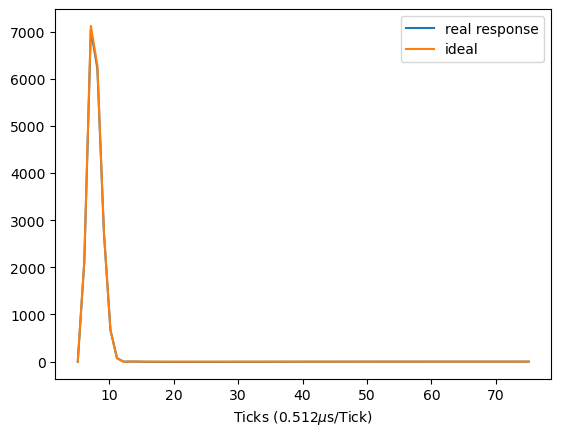

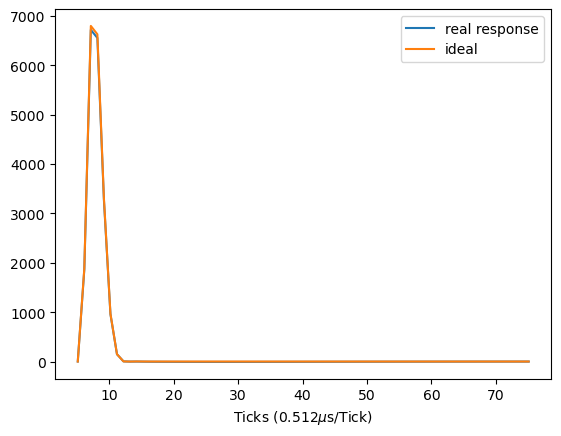

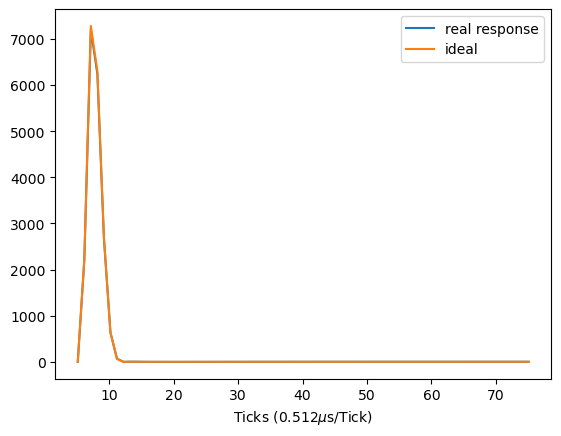

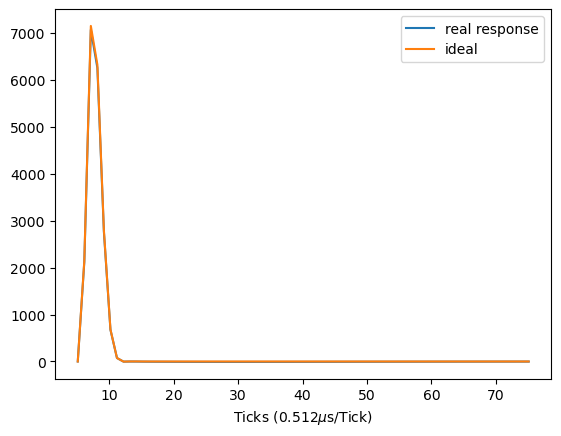

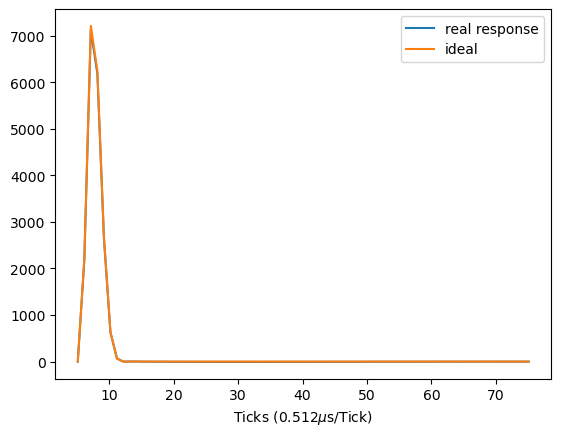

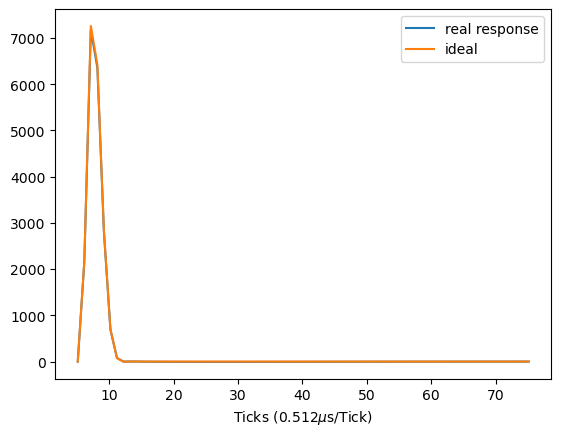

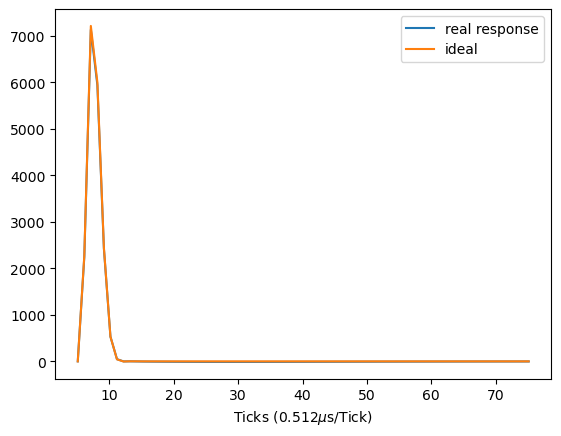

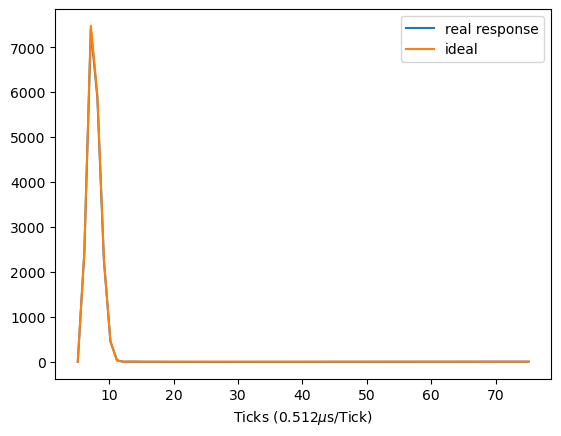

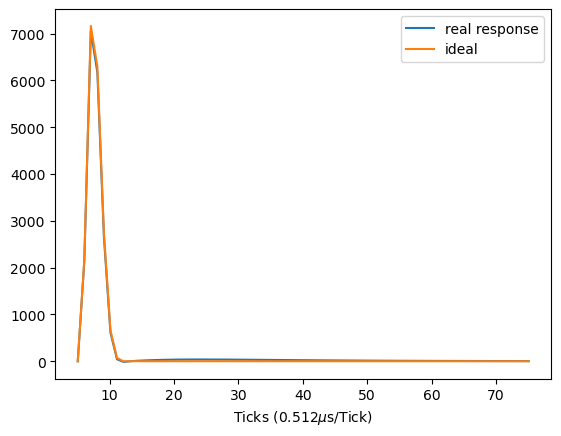

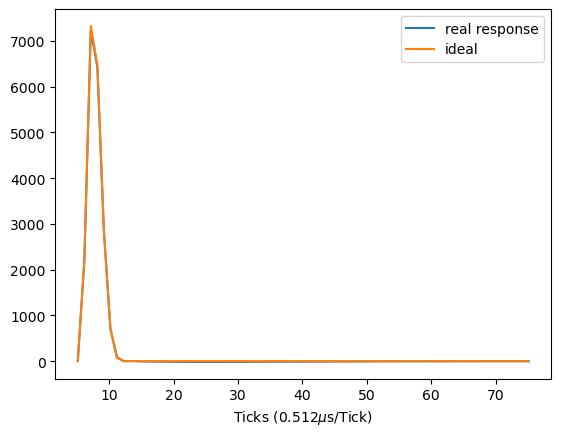

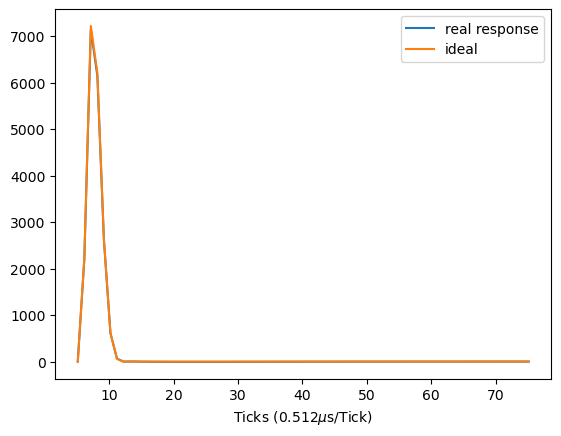

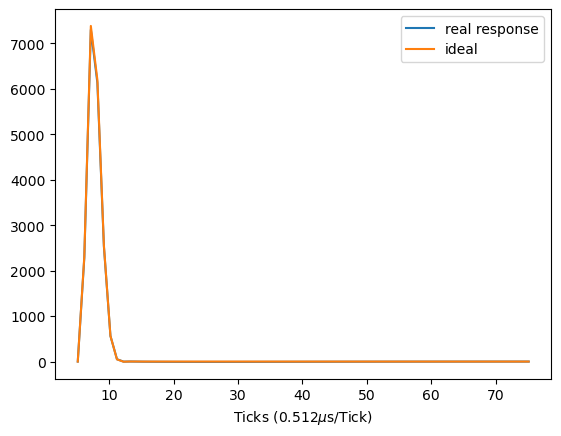

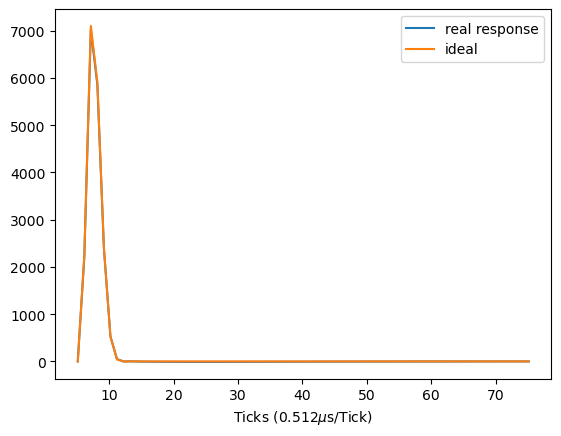

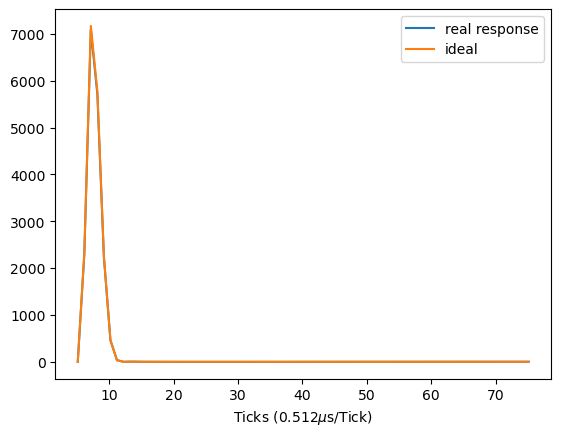

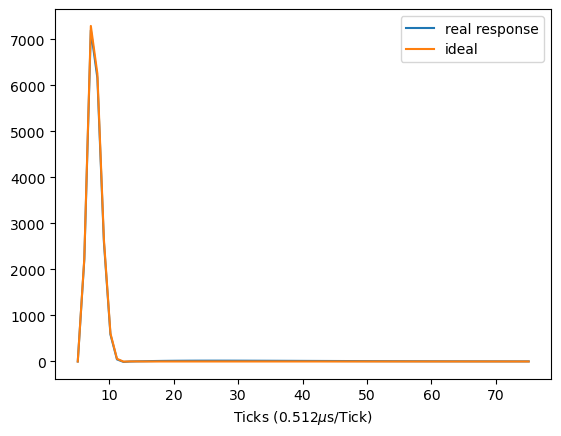

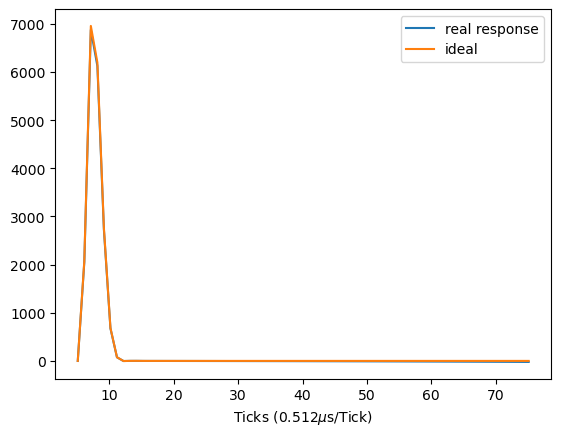

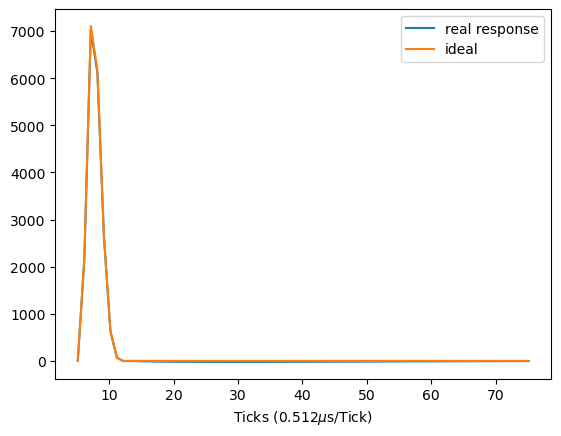

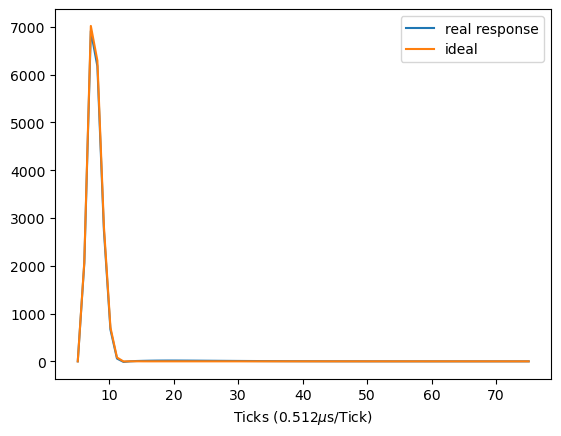

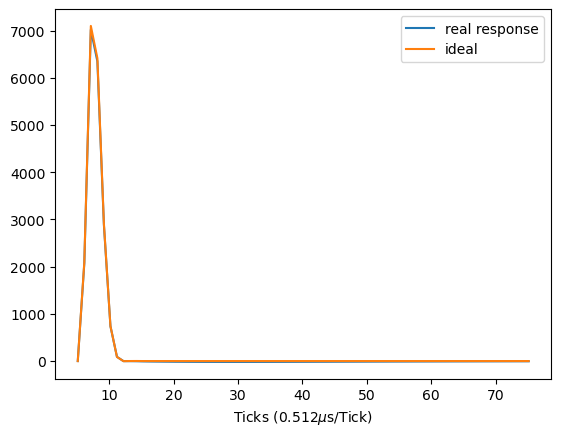

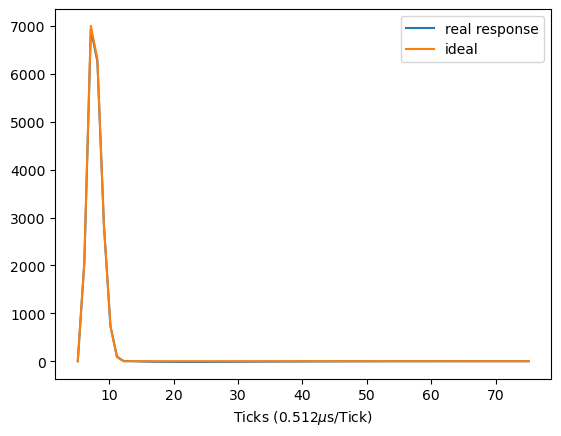

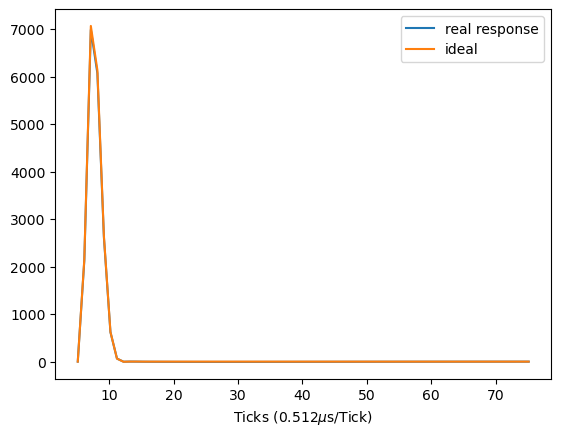

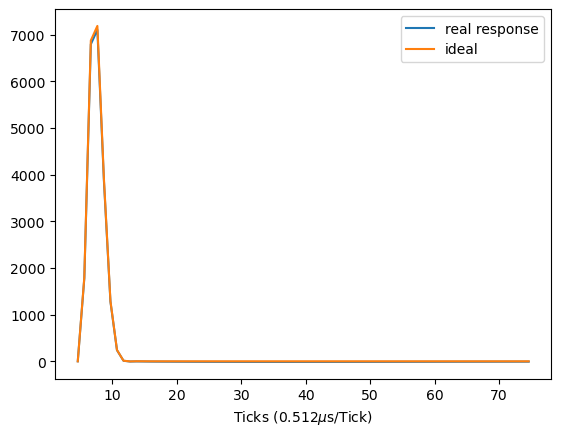

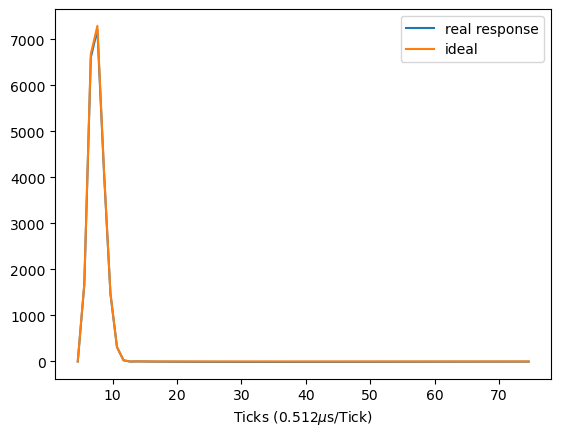

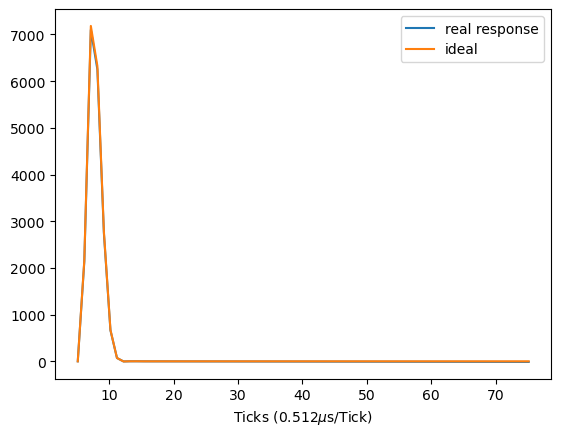

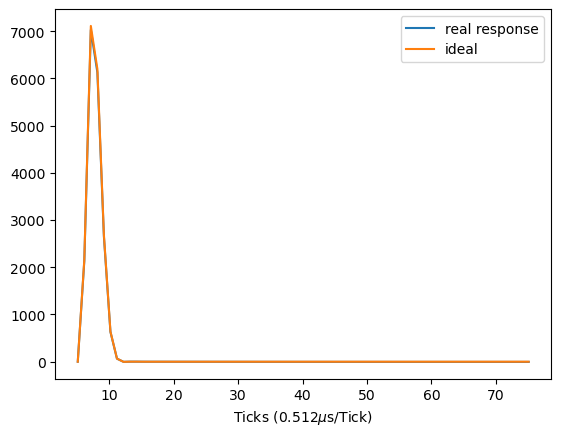

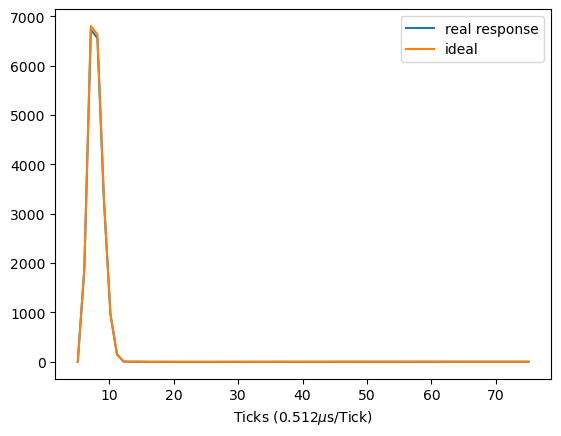

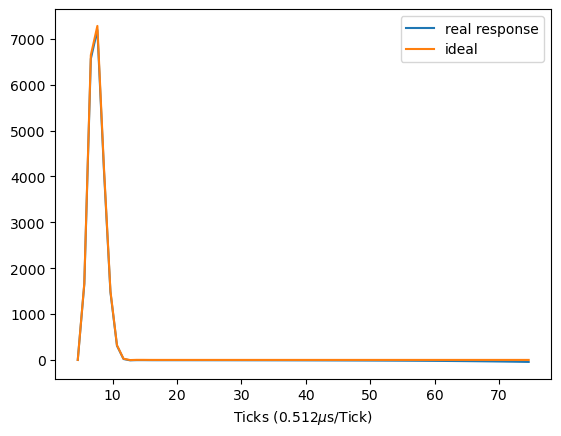

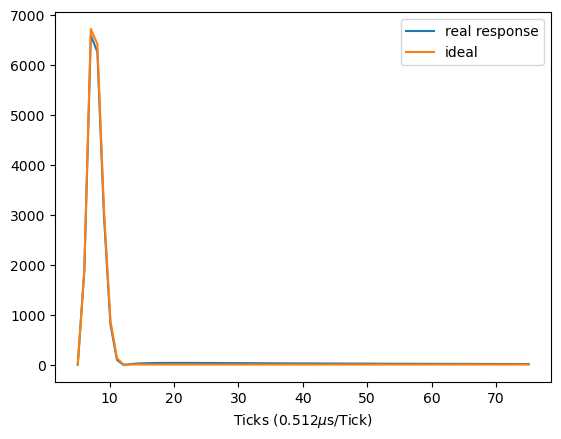

IndexError: single positional indexer is out-of-bounds

In [330]:
for i in ideal_df.index:
    x = np.linspace(ideal_df[mask_ideal_class0].copy().reset_index()['t'].iloc[i], ideal_df[mask_ideal_class0].copy().reset_index()['t'].iloc[i]+70, 70)
    par0 = list(ideal_df[mask_ideal_class0].copy().reset_index()[response_params].iloc[i])
    R = response(x=x, par=par0)
    R_ideal = response_legacy(x=x, par=par0)

    plt.figure()
    plt.plot(x, R, label='real response')
    plt.plot(x, R_ideal, label='ideal')
    plt.xlabel('Ticks (0.512$\mu$s/Tick)')
    plt.legend()
    plt.show()

#### Select overshoot:
* class0: max deviation <= 0.2 and time peak diff == 0
* class1: max deviation <= 0.2 and time peak diff != 0
* class2: 0.2 <= max deviation <= 0.7 and time peak diff == 0
* class3: 0.2 <= max deviation <= 0.7 and time peak diff != 0
* class4: max deviation >= 0.7 and time peak diff == 0
* class4: max deviation >= 0.7 and time peak diff != 0

In [ ]:
mask_class0 = (undershoot_df0['max_deviation'] <= 0.2) & (undershoot_df0['time_peak'] == 0)
mask_class1 = (undershoot_df0['max_deviation'] <= 0.2) & (undershoot_df0['time_peak'] != 0)
mask_class2 = (undershoot_df0['max_deviation'] >= 0.2) & (undershoot_df0['max_deviation'] <= 0.7) & (undershoot_df0['time_peak'] == 0)
mask_class3 = (undershoot_df0['max_deviation'] >= 0.2) & (undershoot_df0['max_deviation'] <= 0.7) & (undershoot_df0['time_peak'] != 0)
mask_class4 = (undershoot_df0['max_deviation'] >= 0.7) & (undershoot_df0['time_peak'] == 0)
mask_class5 = (undershoot_df0['max_deviation'] >= 0.7) & (undershoot_df0['time_peak'] != 0)

In [ ]:
undershoot_df = undershoot_df0.copy()
undershoot_df.loc[mask_class0, 'class'] = 'undershoot_class0'
undershoot_df.loc[mask_class1, 'class'] = 'undershoot_class1'
undershoot_df.loc[mask_class2, 'class'] = 'undershoot_class2'
undershoot_df.loc[mask_class3, 'class'] = 'undershoot_class3'
undershoot_df.loc[mask_class4, 'class'] = 'undershoot_class4'
undershoot_df.loc[mask_class5, 'class'] = 'undershoot_class5'


In [ ]:
undershoot_df

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,...,k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,integral_ideal,max_deviation,time_peak,class
0,11,5.040750,0.008590,88556.38748,571.131,2.184355,0.010283,1.020078,0.021741,1.307345,...,0.022602,0.001684,0.025840,0.001807,4.509772,-1595.153796,1.735842,0.938392,-1.014493,undershoot_class5
1,12,5.048302,0.009184,88978.52446,1572.280,2.194005,0.011428,1.262820,0.038990,1.569498,...,0.033323,0.001346,0.039745,0.001529,4.112891,-2251.796572,1.822815,0.890231,-1.014493,undershoot_class5
2,13,5.035189,0.008785,88787.45122,663.987,2.182900,0.010649,1.068882,0.026822,1.360963,...,0.047138,0.001717,0.052300,0.001892,6.676419,-1293.441320,1.728409,0.939072,-1.014493,undershoot_class5
3,14,5.028565,0.008697,89313.33932,882.150,2.234647,0.010432,0.975918,0.022153,1.258734,...,0.050796,0.002893,0.052906,0.003009,7.536059,-535.950303,2.139200,0.965369,-1.014493,undershoot_class5
4,21,5.031267,0.009001,86596.17160,965.699,2.170595,0.010754,1.074504,0.025149,1.372044,...,0.030116,0.001797,0.033697,0.001935,8.170904,-1378.310654,1.585990,0.909837,-1.014493,undershoot_class5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,10215,5.068025,0.008609,75219.53020,452.545,2.003969,0.006173,0.092557,0.011309,0.095988,...,0.092562,0.011342,0.095978,0.005358,8.050469,-776.834932,1.667151,0.082512,0.000000,undershoot_class0
3224,10225,5.036752,0.009170,85349.48959,1973.660,2.118217,0.022174,1.263492,0.142272,1.484675,...,0.165512,0.010475,0.169706,0.010943,5.165367,-195.894669,2.210773,0.630023,0.000000,undershoot_class2
3225,10230,5.091368,0.008622,74701.18809,425.594,2.152389,0.005929,0.072689,0.002126,0.075013,...,0.072704,0.002120,0.075030,0.002181,4.418884,-756.443293,1.238795,0.071524,0.000000,undershoot_class0
3226,10232,5.095215,0.009080,75296.92869,441.343,2.137279,0.007146,0.161297,0.006451,0.134389,...,0.108728,0.003473,0.134402,0.004725,3.932620,-552.383845,1.919676,0.043382,0.000000,undershoot_class0


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6722/940233053.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')


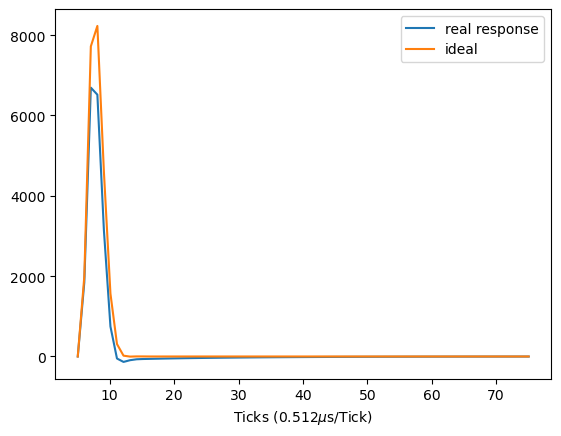

In [331]:
x = np.linspace(undershoot_df[mask_class5].copy().reset_index()['t'].iloc[9], undershoot_df[mask_class5].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(undershoot_df[mask_class5].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

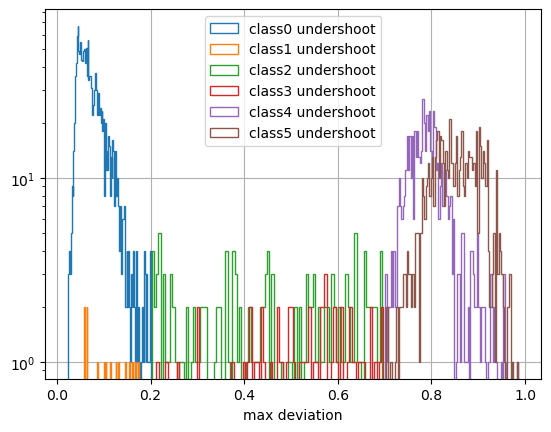

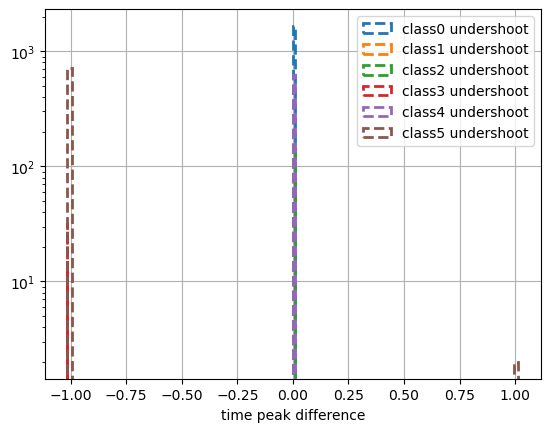

In [332]:
plt.figure()
undershoot_df[mask_class0]['max_deviation'].hist(bins=100, histtype='step', label='class0 undershoot')
undershoot_df[mask_class1]['max_deviation'].hist(bins=100, histtype='step', label='class1 undershoot')
undershoot_df[mask_class2]['max_deviation'].hist(bins=100, histtype='step', label='class2 undershoot')
undershoot_df[mask_class3]['max_deviation'].hist(bins=100, histtype='step', label='class3 undershoot')
undershoot_df[mask_class4]['max_deviation'].hist(bins=100, histtype='step', label='class4 undershoot')
undershoot_df[mask_class5]['max_deviation'].hist(bins=100, histtype='step', label='class5 undershoot')
plt.xlabel('max deviation')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()
undershoot_df[mask_class0]['time_peak'].hist(bins=100, histtype='step', label='class0 undershoot', ls='--', linewidth=2)
undershoot_df[mask_class1]['time_peak'].hist(bins=100, histtype='step', label='class1 undershoot', ls='--', linewidth=2)
undershoot_df[mask_class2]['time_peak'].hist(bins=100, histtype='step', label='class2 undershoot', ls='--', linewidth=2)
undershoot_df[mask_class3]['time_peak'].hist(bins=100, histtype='step', label='class3 undershoot', ls='--', linewidth=2)
undershoot_df[mask_class4]['time_peak'].hist(bins=100, histtype='step', label='class4 undershoot', ls='--', linewidth=2)
undershoot_df[mask_class5]['time_peak'].hist(bins=100, histtype='step', label='class5 undershoot', ls='--', linewidth=2)
plt.xlabel('time peak difference')
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6722/1480240616.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')
/tmp/ipykernel_6722/1480240616.py:23: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')
/tmp/ipykernel_6722/1480240616.py:36: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')
/tmp/ipykernel_6722

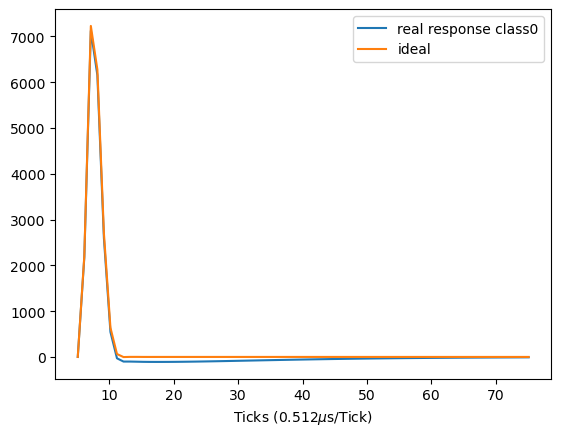

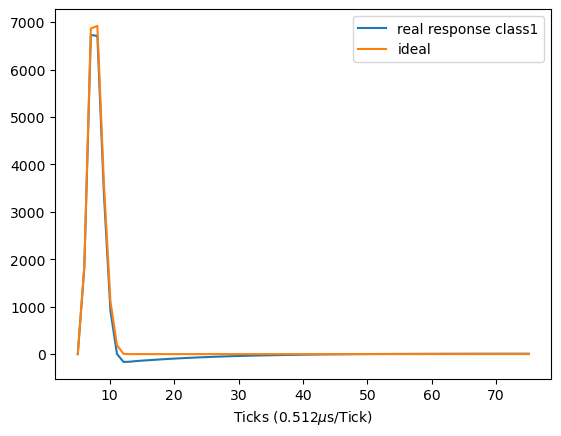

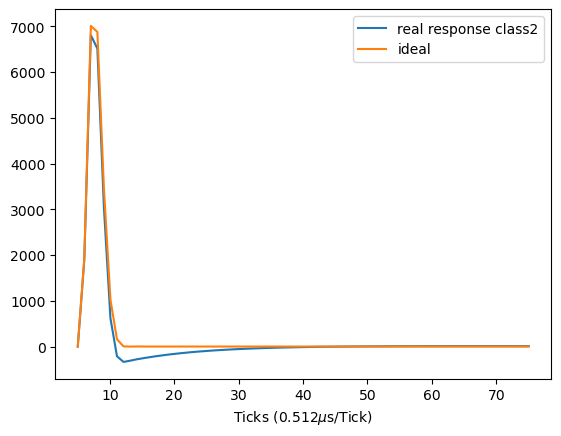

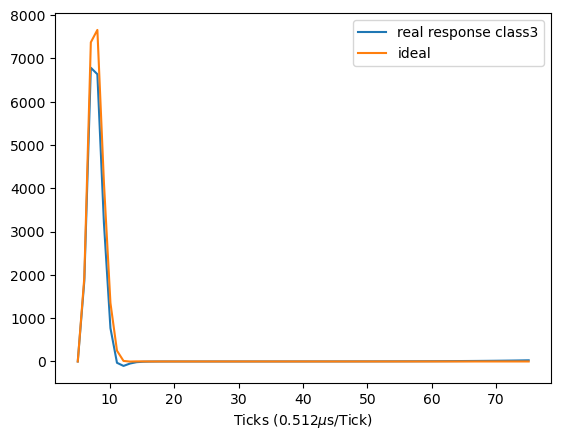

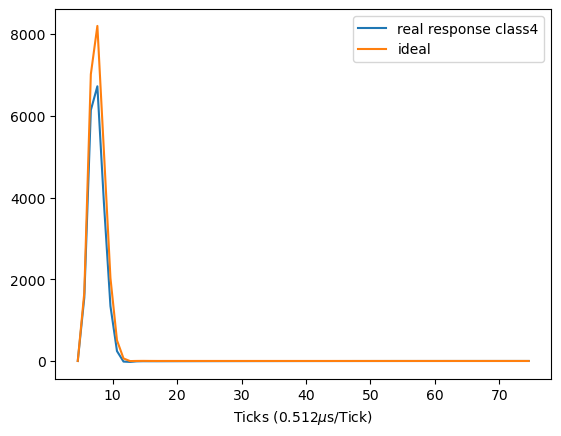

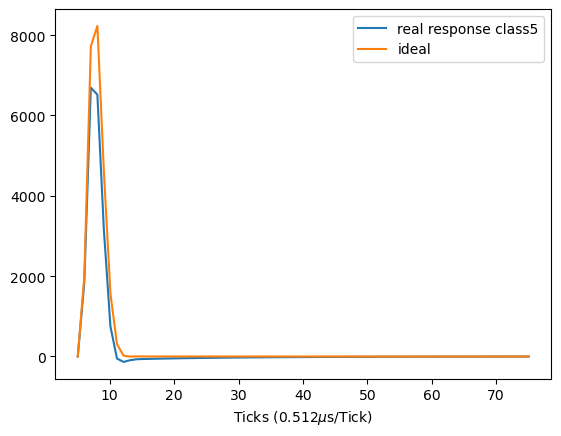

In [333]:
# class0
x = np.linspace(undershoot_df[mask_class0].copy().reset_index()['t'].iloc[9], undershoot_df[mask_class0].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(undershoot_df[mask_class0].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class0')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class1
x = np.linspace(undershoot_df[mask_class1].copy().reset_index()['t'].iloc[9], undershoot_df[mask_class1].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(undershoot_df[mask_class1].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class1')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class2
x = np.linspace(undershoot_df[mask_class2].copy().reset_index()['t'].iloc[9], undershoot_df[mask_class2].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(undershoot_df[mask_class2].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class2')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class3
x = np.linspace(undershoot_df[mask_class3].copy().reset_index()['t'].iloc[9], undershoot_df[mask_class3].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(undershoot_df[mask_class3].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class3')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class4
x = np.linspace(undershoot_df[mask_class4].copy().reset_index()['t'].iloc[9], undershoot_df[mask_class4].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(undershoot_df[mask_class4].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class4')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class5
x = np.linspace(undershoot_df[mask_class5].copy().reset_index()['t'].iloc[9], undershoot_df[mask_class5].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(undershoot_df[mask_class5].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class5')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

#### Select Overshoot:
* class0: max deviation <= 0.2 and time peak diff == 0
* class1: max deviation <= 0.2 and time peak diff != 0
* class2: 0.2 <= max deviation <= 0.7 and time peak diff == 0
* class3: 0.2 <= max deviation <= 0.7 and time peak diff != 0
* class4: max deviation >= 0.7 and time peak diff == 0
* class4: max deviation >= 0.7 and time peak diff != 0

In [334]:
mask_class0 = (overshoot_df0['max_deviation'] <= 0.2) & (overshoot_df0['time_peak'] == 0)
mask_class1 = (overshoot_df0['max_deviation'] <= 0.2) & (overshoot_df0['time_peak'] != 0)
mask_class2 = (overshoot_df0['max_deviation'] >= 0.2) & (overshoot_df0['max_deviation'] <= 0.7) & (overshoot_df0['time_peak'] == 0)
mask_class3 = (overshoot_df0['max_deviation'] >= 0.2) & (overshoot_df0['max_deviation'] <= 0.7) & (overshoot_df0['time_peak'] != 0)
mask_class4 = (overshoot_df0['max_deviation'] >= 0.7) & (overshoot_df0['time_peak'] == 0)
mask_class5 = (overshoot_df0['max_deviation'] >= 0.7) & (overshoot_df0['time_peak'] != 0)

In [335]:
overshoot_df = overshoot_df0.copy()
overshoot_df.loc[mask_class0, 'class'] = 'overshoot_class0'
overshoot_df.loc[mask_class1, 'class'] = 'overshoot_class1'
overshoot_df.loc[mask_class2, 'class'] = 'overshoot_class2'
overshoot_df.loc[mask_class3, 'class'] = 'overshoot_class3'
overshoot_df.loc[mask_class4, 'class'] = 'overshoot_class4'
overshoot_df.loc[mask_class5, 'class'] = 'overshoot_class5'

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6722/2737843241.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')
/tmp/ipykernel_6722/2737843241.py:23: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')
/tmp/ipykernel_6722/2737843241.py:36: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')
/tmp/ipykernel_6722

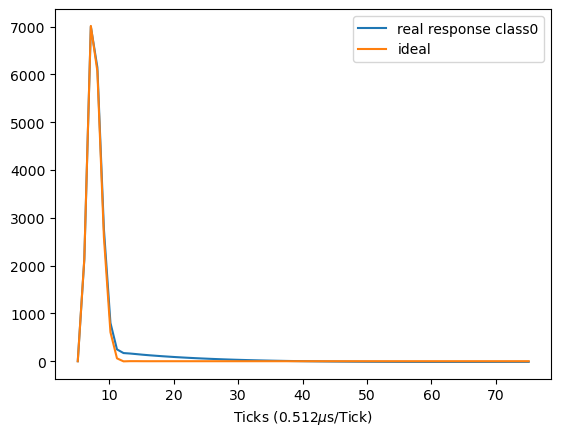

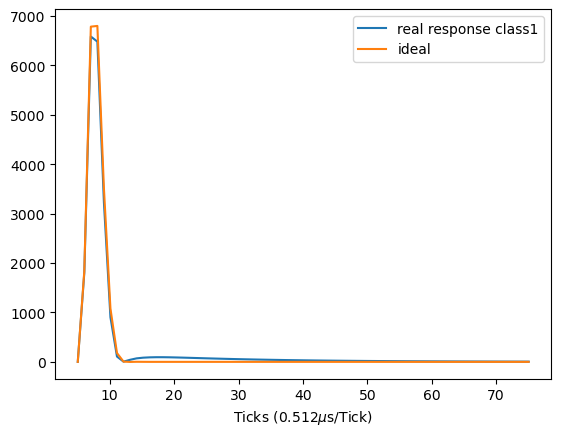

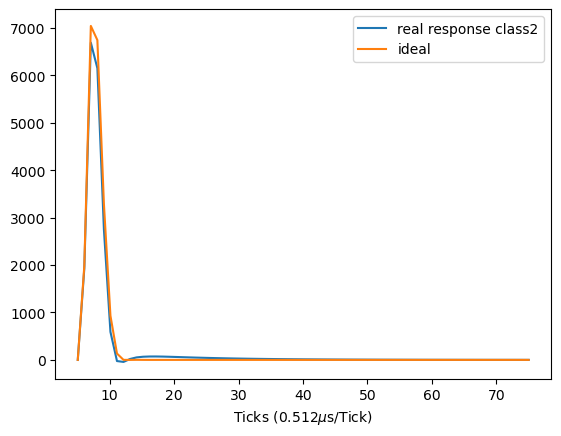

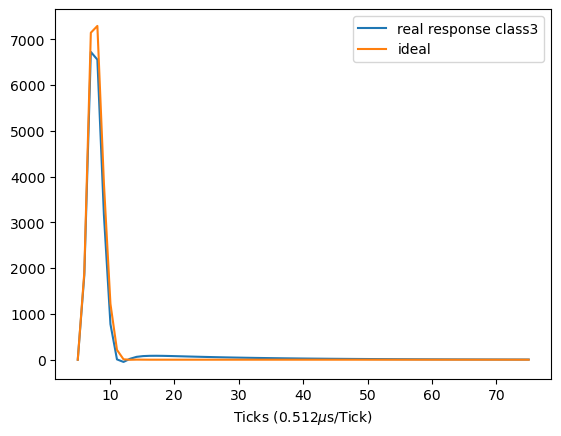

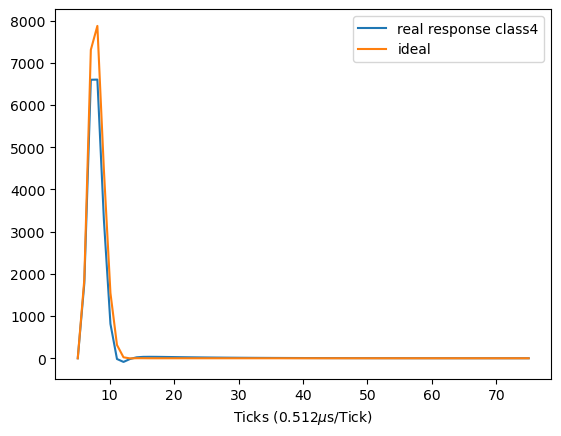

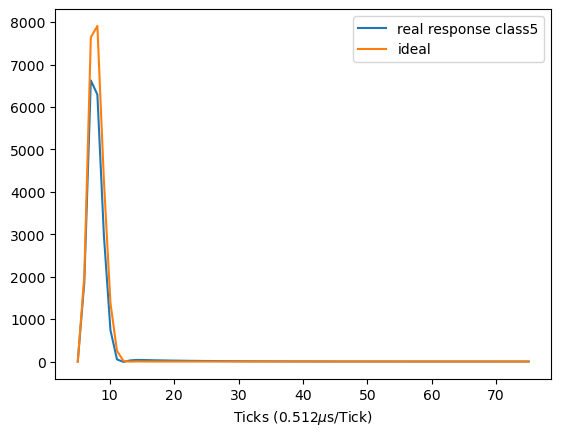

In [336]:
# class0
x = np.linspace(overshoot_df[mask_class0].copy().reset_index()['t'].iloc[9], overshoot_df[mask_class0].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(overshoot_df[mask_class0].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class0')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class1
x = np.linspace(overshoot_df[mask_class1].copy().reset_index()['t'].iloc[9], overshoot_df[mask_class1].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(overshoot_df[mask_class1].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class1')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class2
x = np.linspace(overshoot_df[mask_class2].copy().reset_index()['t'].iloc[9], overshoot_df[mask_class2].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(overshoot_df[mask_class2].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class2')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class3
x = np.linspace(overshoot_df[mask_class3].copy().reset_index()['t'].iloc[9], overshoot_df[mask_class3].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(overshoot_df[mask_class3].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class3')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class4
x = np.linspace(overshoot_df[mask_class4].copy().reset_index()['t'].iloc[9], overshoot_df[mask_class4].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(overshoot_df[mask_class4].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class4')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

# class5
x = np.linspace(overshoot_df[mask_class5].copy().reset_index()['t'].iloc[9], overshoot_df[mask_class5].copy().reset_index()['t'].iloc[9]+70, 70)
par0 = list(overshoot_df[mask_class5].copy().reset_index()[response_params].iloc[9])
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)

plt.figure()
plt.plot(x, R, label='real response class5')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

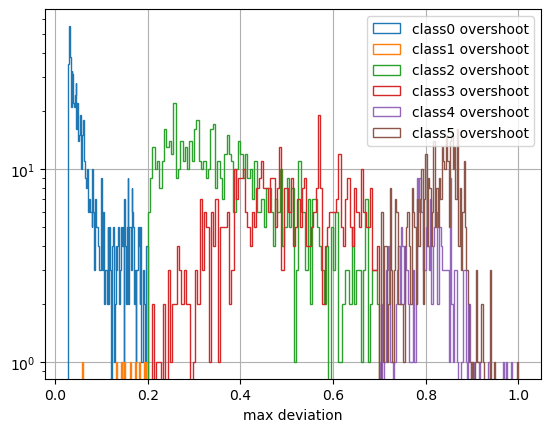

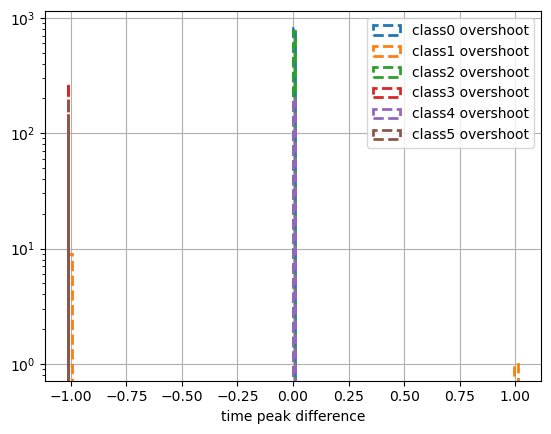

In [337]:
plt.figure()
overshoot_df[mask_class0]['max_deviation'].hist(bins=100, histtype='step', label='class0 overshoot')
overshoot_df[mask_class1]['max_deviation'].hist(bins=100, histtype='step', label='class1 overshoot')
overshoot_df[mask_class2]['max_deviation'].hist(bins=100, histtype='step', label='class2 overshoot')
overshoot_df[mask_class3]['max_deviation'].hist(bins=100, histtype='step', label='class3 overshoot')
overshoot_df[mask_class4]['max_deviation'].hist(bins=100, histtype='step', label='class4 overshoot')
overshoot_df[mask_class5]['max_deviation'].hist(bins=100, histtype='step', label='class5 overshoot')
plt.xlabel('max deviation')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()
overshoot_df[mask_class0]['time_peak'].hist(bins=100, histtype='step', label='class0 overshoot', ls='--', linewidth=2)
overshoot_df[mask_class1]['time_peak'].hist(bins=100, histtype='step', label='class1 overshoot', ls='--', linewidth=2)
overshoot_df[mask_class2]['time_peak'].hist(bins=100, histtype='step', label='class2 overshoot', ls='--', linewidth=2)
overshoot_df[mask_class3]['time_peak'].hist(bins=100, histtype='step', label='class3 overshoot', ls='--', linewidth=2)
overshoot_df[mask_class4]['time_peak'].hist(bins=100, histtype='step', label='class4 overshoot', ls='--', linewidth=2)
overshoot_df[mask_class5]['time_peak'].hist(bins=100, histtype='step', label='class5 overshoot', ls='--', linewidth=2)
plt.xlabel('time peak difference')
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

### Merge all dataframes with labels

In [338]:
output_df = pd.concat([ideal_df, undershoot_df, overshoot_df], axis=0)

In [339]:
output_df = output_df.reset_index().drop('index', axis=1)

In [340]:
output_df

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,...,k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,integral_ideal,max_deviation,time_peak,class
0,27,5.026208,0.009095,77397.44901,513.901,2.120217,0.011064,0.461558,0.023110,0.541846,...,0.084142,0.003332,0.075697,0.002791,6.949847,0.000000,0.000000,0.359610,0.0,ideal_class1
1,29,5.020406,0.009001,78109.25518,591.148,2.138809,0.011979,0.561821,0.025246,0.662031,...,0.051719,0.002366,0.045847,0.002085,5.100328,0.000000,0.000000,0.427803,0.0,ideal_class1
2,30,5.032076,0.009131,77888.92272,510.013,2.094083,0.010768,0.441545,0.023579,0.512535,...,0.062798,0.002715,0.054859,0.002260,3.084513,0.000000,0.000000,0.326275,0.0,ideal_class1
3,234,5.035825,0.008914,79029.88703,504.602,2.125513,0.010632,0.491507,0.027460,0.566600,...,0.107775,0.007456,0.101695,0.006645,5.240735,0.000000,0.000000,0.352626,0.0,ideal_class1
4,244,5.047859,0.009059,76720.65087,537.404,2.131137,0.011350,0.553060,0.030174,0.624168,...,0.055746,0.003920,0.052583,0.003658,4.399844,0.000000,0.000000,0.326069,0.0,ideal_class1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,10219,5.091361,0.008972,76385.12167,469.640,1.979175,0.006975,0.049197,0.003300,0.035414,...,0.026578,0.003170,0.035421,0.003157,9.264075,807.422540,1.548042,0.042802,0.0,overshoot_class0
6136,10222,5.104848,0.009951,73687.26229,463.515,2.095373,0.008364,0.058495,0.002032,0.027759,...,0.014693,0.001748,0.027787,0.001718,6.315967,3605.438343,1.913742,0.165221,0.0,overshoot_class0
6137,10224,5.081329,0.009629,83548.37431,1753.900,2.195073,0.016421,1.624984,0.135674,1.869724,...,0.053812,0.005959,0.053016,0.005882,6.174783,207.781507,1.719655,0.538978,0.0,overshoot_class2
6138,10226,5.105504,0.009342,75059.88015,451.101,2.103103,0.007255,0.029225,0.002810,0.016374,...,0.008011,0.002532,0.016458,0.002603,7.309111,1029.575895,1.951460,0.042463,0.0,overshoot_class0


In [341]:
output_df.to_csv('data/run_30413/run_30413_labelled.csv', index=False)